# Lending Club Case Study
## Group Members
- Soumita Das
- Jafar Naqvi

## Import libraries and source Dataset
- Import the required libraries
- Load the dataset into dataframe
- Set the max columns, max rows settings in pandas to view all columns/rows in the dataset
- Suppress the warnings for clean view of the output 

In [1]:
# import all the required python libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # ignore the warnings

In [2]:
# Create a pandas dataframe and load the dataset
# View all the columns in the dataset
# set pandas's settings to display max columns and rows in the dataset
loan_df=pd.read_csv("loan.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


------------------------

## Inspect the dataset
Find some information on the dataset

In [3]:
# get the dataset info on how many rows and columns are present
loan_df.shape

(39717, 111)

In [4]:
# get some information on all the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# get some stats info on the dataset
# some of the stats info like mean value can be used later to replace the missing value with the respective mean value
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Check the datatypes for all the columns
data_types=loan_df.dtypes
pd.DataFrame(data_types).T

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,int64,int64,int64,int64,float64,object,object,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,float64,int64,object,int64,float64,float64,int64,int64,int64,object,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,int64,object,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


### <span style="color:blue">Observation on Data Inspection</span> 
1. There are 39717 records and 111 columns.
2. The dataset contains mixed datatypes - float64(74), int64(13), object(24)
3. There are column which has date values but the datatype is Object 

----------------------------------------------------------------------------------- 

## Distribution of data based on loan status on the given data

In [7]:
#Distribution of data based on loan status
loan_status=loan_df.loan_status.value_counts()
loan_status

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Data Distribution on Loan Status in %')

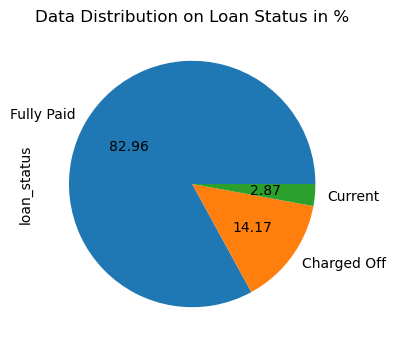

In [8]:
fig = plt.figure(figsize=(4,4))
pie_chart=loan_df['loan_status'].value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Data Distribution on Loan Status in %")

## Data Cleaning
### Check for Columns which can be dropped 

- Check for Null values in the columns.
- Check for columns which has all NA values which can be dropped.
- Find the columns which has only one unique value and can be dropped as it will not contribute to analysis
- Check for columns which is not relevant for analysis based on the data dictionary definition and can be dropped.
- Remove the records for 'Current' loans

### Check for duplicates

### Datatype checks
- Check the Datatype for all the columns.
- Convert the Datatype from Object to Datetime for the Date columns.
### Derived Attributes
- Split the date columns to get month,year,day as new columns in the dataset.
- Add derived columns based on 2 measure columns for analysis.
- Add derived columns for buckets/bins on numerical columns which has many unique values.

### Missing Value check and Replace the missing values
- Check the Numerical Columns. Analyse and then Replace/drop accordingly.
- Check the Categorical Columns.Analyse and then Replace/drop accordingly.
- Check for Outliers.Analyze and then Replace/drop accordingly.

-------------

### Check for Columns which can be dropped

In [9]:
# find number of columns with Null values
loan_df.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [10]:
# Get the list of columns in the dataset where the column has atleast one non missing value (i.e. NA).
loan_df_not_na=loan_df.columns[loan_df.notna().any()]
loan_df_not_na

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [11]:
# Clean the dataset by removing all the columns which has no values i.e. has NA
# Check how many columns are there with atleast one notna values
loan_df[loan_df_not_na].shape

(39717, 57)

In [12]:
#Replace the existing dataset with the required columns with atleast 1 notNA value
# or drop the columns with all NA values
loan_df=loan_df[loan_df_not_na]
loan_df.shape

(39717, 57)

#### <span style="color:blue" >The Dataset now contains 57 columns/attributes for next steps in analysis

### Check for Duplicates in the dataset


In [13]:
# Check for duplicate rows in the dataset
duplicates=loan_df[loan_df.duplicated]
print(duplicates)

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []


In [14]:
loan_df.duplicated().sum()

0

In [15]:
loan_df.shape

(39717, 57)

#### <span style="color:blue">There are no duplicates in the dataset</span>

--------

### Find the columns which has only one unique value.

Column which has only one Unique value i.e. column with constant value will not contribute to any analysis and hence can be dropped.

In [16]:
constant_col = [col for col in loan_df.columns if loan_df[col].nunique() == 1]

In [17]:
constant_col

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [18]:
# number of columns having contant values
len(constant_col)

9

In [19]:
# drop the columns which has constant values
loan_df.drop(columns=constant_col, inplace=True)

In [20]:
# check that the constant columns are dropped
loan_df.shape

(39717, 48)

#### <span style="color:blue">There are 9 columns which has only 1 unique value which has been dropped.There are now 48 columns in the dataset for the next steps in analysis.</span>


--------------

### Find the columns which can be dropped.
Below columns does not contribute to the analysis and can be removed :
- url,member_id,desc >>> these are redundant columns, we can keep 'id' column for unique records.
- total_rec_int,total_rec_prncp,revol_bal,out_prncp, out_prncp_inv,last_credit_pull_d,last_pymnt_d >>> these are applicable for already approved loans
- total_rec_late_fee,recoveries,collection_recovery_fee >>> these are applicable for charged off 
- emp_title,title >>> these can be removed since they have lot if unique values

In [21]:
# Drop the columns which are not relevant for analysis
loan_df.drop(['url','member_id','desc','total_rec_int','total_rec_prncp','revol_bal','out_prncp', 'out_prncp_inv','last_credit_pull_d','last_pymnt_d','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1,inplace=True)

In [22]:
#emp_title,title >>> these can be removed since they have lot if unique values
loan_df.drop(['emp_title','title'],axis=1,inplace=True)

In [23]:
loan_df.shape

(39717, 33)

In [24]:
#Find the % null values present in the remaining columns
round(loan_df.isnull().sum()/len(loan_df)*100,2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
last_pymnt_amnt            0.00
next_pym

In [25]:
# Drop the columns which has more than 50% NUll values
loan_df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [26]:
loan_df.shape

(39717, 30)

In [27]:
loan_df.head(3).T

,0,1,2
id,1077501,1077430,1077175
loan_amnt,5000,2500,2400
funded_amnt,5000,2500,2400
funded_amnt_inv,4975.0,2500.0,2400.0
term,36 months,60 months,36 months
int_rate,10.65%,15.27%,15.96%
installment,162.87,59.83,84.33
grade,B,C,C
sub_grade,B2,C4,C5
emp_length,10+ years,< 1 year,10+ years


#### <span style="color:blue"> Further 16 columns were dropped and now we have 30 columns in the dataset for further analysis</span>

--------

### Datatype Checks

In [28]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

<span style="color:blue" > - int_rate, revol_util >> these columns show percentage values but have Object datatype which needs to be converted to float.</span> 

<span style="color:blue" > - issue_d,earliest_cr_line >> these columns show date value so need to be converted from object datatype to datetime </span> 

In [29]:
# Stripping '%' and then converting to float
loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)
loan_df['revol_util'] = loan_df.revol_util.str.strip('%').astype(float)
print(loan_df[['int_rate', 'revol_util']].dtypes)

int_rate      float64
revol_util    float64
dtype: object


In [30]:
# Convert to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')

loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')

print(loan_df[['issue_d', 'earliest_cr_line']].dtypes)

issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
dtype: object


In [31]:
# The datatype is converted
print(loan_df[['issue_d', 'earliest_cr_line']].head(3))

     issue_d earliest_cr_line
0 2011-12-01       1985-01-01
1 2011-12-01       1999-04-01
2 2011-12-01       2001-11-01


-------

### Derived Attributes
- Split the date columns to get month,year,day as new columns in the dataset.
- Add derived columns based on 2 measure columns for analysis.
- Add derived columns for buckets/bins on numerical columns which has many unique values.

In [32]:
# Deriving the year attribute from 'issue_year' column
loan_df['issue_year']=loan_df['issue_d'].dt.year

# Deriving the month attribute from 'issue_year' column
loan_df['issue_month']=loan_df['issue_d'].dt.month

# Show the derived columns
loan_df[['issue_d', 'issue_year', 'issue_month']].head(3)

,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12


In [33]:
# Deriving the year attribute from 'issue_year' column
loan_df['issue_year']=loan_df['issue_d'].dt.year

# Deriving the month attribute from 'issue_year' column
loan_df['issue_month']=loan_df['issue_d'].dt.month

# Show the derived columns
loan_df[['issue_d', 'issue_year', 'issue_month']].head(3)

,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12


In [34]:
# Deriving the year attribute from 'issue_year' column
loan_df['earliest_cr_line_year']=loan_df['earliest_cr_line'].dt.year

# Deriving the month attribute from 'issue_year' column
loan_df['earliest_cr_line_month']=loan_df['earliest_cr_line'].dt.month

# Show the derived columns
loan_df[['earliest_cr_line', 'earliest_cr_line_year', 'earliest_cr_line_month']].head(3)

,earliest_cr_line,earliest_cr_line_year,earliest_cr_line_month
0,1985-01-01,1985,1
1,1999-04-01,1999,4
2,2001-11-01,2001,11


Add a column to check the % of amount funded from the applied loan

In [35]:
loan_df['approved_loan_perc'] = round((loan_df.funded_amnt_inv/loan_df.loan_amnt)*100,2)

In [36]:
loan_df['approved_loan_perc'].head(3)

0     99.5
1    100.0
2    100.0
Name: approved_loan_perc, dtype: float64

In [98]:
# Create a new attribute for annual income bucket
loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_df['annual_inc_bins'].value_counts()

31k-58k      16802
3k-31k       15389
58k-85k       4498
85k-112k      1118
112k-140k      384
Name: annual_inc_bins, dtype: int64

In [38]:
# check how many distinct int rate values are present
loan_df['int_rate'].nunique()

371

In [39]:
# Create a new attribute for int_rate bucket
loan_df['int_rate_bins'] = pd.cut(loan_df['int_rate'], bins=5,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['int_rate_bins'].value_counts()

9%-13%     14632
13%-17%    11108
5%-9%      10027
17%-21%     3397
21%-24%      553
Name: int_rate_bins, dtype: int64

In [40]:
# Create a new attribute for dti bucket
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins=6,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
loan_df['dti_bins'].value_counts()

10-15    9893
15-20    9108
5-10     8062
20-25    6836
0-5      5140
25-30     678
Name: dti_bins, dtype: int64

--------

### Remove the non relevant rows
The loan_status column contains 3 values Fully Paid,Charged Off,Current

We need only Fully Paid and Charged Off data for analysis

We need to remove the 'Current' records from the dataset

In [41]:
#Remove the Current loan status rows
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [42]:
loan_df.shape

(38577, 38)

In [43]:
loan_df.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_util      

----

### Missing Value check and Replace the missing values
- Check the Numerical Columns. Analyse and then Replace/drop accordingly.
- Check the Categorical Columns.Analyse and then Replace/drop accordingly.
- Check for Outliers.Analyze and then Replace/drop accordingly.

In [44]:
# check for null values in the columns
loan_df.isnull().sum()

id                           0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                1033
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_util                  50
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
last_pymnt_amnt              0
pub_rec_bankruptcies       697
issue_year                   0
issue_month                  0
earliest

In [45]:
# check which valus has max count in emp_length
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [46]:
# replace the null values with mode
loan_df['emp_length']=loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])
loan_df['emp_length'].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

<span style="color:blue">Here in this case the missing values in 'emp_length' column is filled with its mode i.e '10+ years' value </span>

In [47]:
# check which valus has max count in pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [48]:
# replace the null values with mode
loan_df['pub_rec_bankruptcies']=loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0])
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [49]:
#Replace the missing values for 'revol_util' column
# check the stats, mean and median are nearly same hence we can replace with mean or median
loan_df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [50]:
loan_df['revol_util'].median()

49.1

In [51]:
#replace null will median
loan_df['revol_util'] = loan_df['revol_util'].fillna(loan_df['revol_util'].median())

In [52]:
#check that there are no missing values in the column
loan_df['revol_util'].isnull().sum()

0

In [53]:
# check if there are any missing values in the dataset
loan_df.isnull().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util                0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
last_pymnt_amnt           0
pub_rec_bankruptcies      0
issue_year                0
issue_month               0
earliest_cr_line_year     0
earliest_cr_line_month    0
approved_loan_perc        0
annual_inc_bins     

### <span style="color:blue"> Observation on Data Cleaning </span>

1. The provided dataset contains 39717 rows/records and 111 columns/attributes.
2. The given dataset has mixed datatype (float64(74), int64(13), object(24)).
3. The columns where all the values were 'NA' were dropped.
4. The columns which contain only 1 unique value has been dropped
5. There were no duplicates found
6. The columns which has more than 50% NA/nulls has been dropped
7. The 'Current' loan status rows has been dropped since it doesnt contribute to Analysis
8. The non relevant columns has been dropped based on the data dictionary definition with no contribution to analysis.
9. The datatypes has been converted for the columns for further analysis.
10. Some derived columns were created from date attributes and from some measure attributes.
11. Some derived bucket columns were created for further analysis.
12. Missing values from the columns has been replaced.

---------

## Univariate Analysis
- Categorical Variables
- Numerical Variables

#### Checking the similarity between different Amount columns

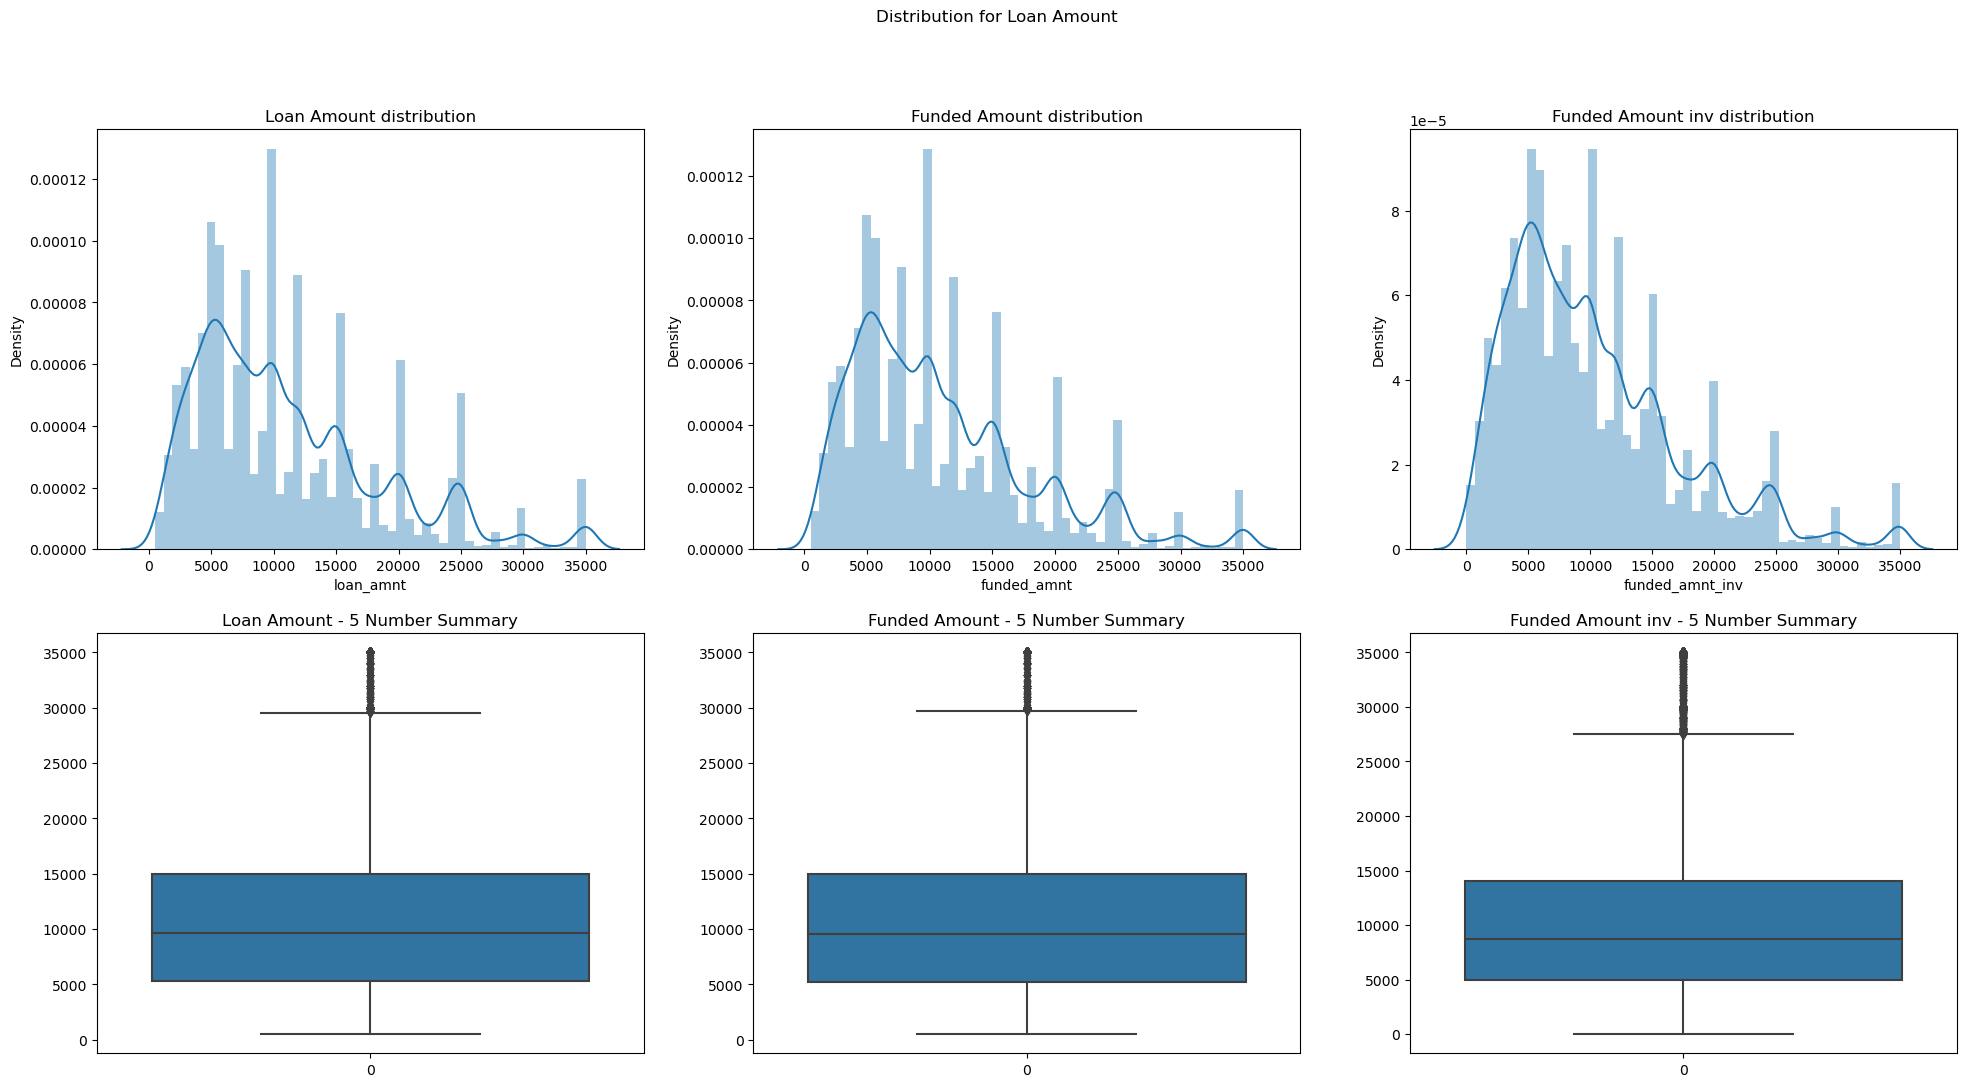

In [54]:
#Increasing the figure size of plot
plt.figure(figsize=(24,12))

#Histogram plot loan_amnt
plt.subplot(2,3,1)
sns.distplot(loan_df.loan_amnt)
plt.title('Loan Amount distribution')

#Box plot loan_amnt
plt.subplot(2,3,4)
sns.boxplot(loan_df.loan_amnt,orient='vertical')
plt.title('Loan Amount - 5 Number Summary')

#Histogram plot funded_amnt
plt.subplot(2,3,2)
sns.distplot(loan_df.funded_amnt)
plt.title('Funded Amount distribution')

#Box plot funded_amnt
plt.subplot(2,3,5)
sns.boxplot(loan_df.funded_amnt,orient='vertical')
plt.title('Funded Amount - 5 Number Summary')

#Histogram plot funded_amnt_inv
plt.subplot(2,3,3)
sns.distplot(loan_df.funded_amnt_inv)
plt.title('Funded Amount inv distribution')

#Box plot funded_amnt_inv
plt.subplot(2,3,6)
sns.boxplot(loan_df.funded_amnt_inv,orient='vertical')
plt.title('Funded Amount inv - 5 Number Summary')

#Title for all the plots for three amounts
plt.suptitle('Distribution for Loan Amount')
plt.show()

#### <span style="color:blue"> Observation </span>
From above plots, all the 3 amounts have similar distribution hence we can pick anyone of the amounts for analysis. <br>
We will take loan_amnt for analysis.

### loan_amnt - Numerial Variable - Univariate Analysis

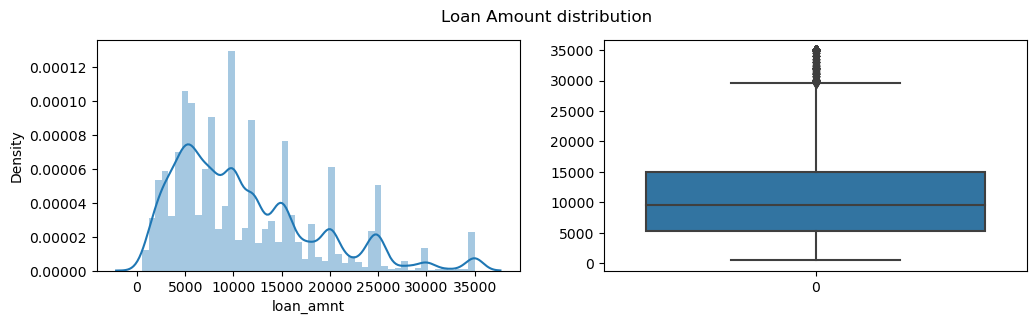

In [55]:
#Setting the figure size of plot
plt.figure(figsize=(12,3))

#Setting subplot index
#Histogram plot loan_amnt
plt.subplot(1,2,1)
sns.distplot(loan_df.loan_amnt)

#Box plot loan_amnt
plt.subplot(1,2,2)
sns.boxplot(loan_df.loan_amnt,orient='vertical')

#Title for both the plots
plt.suptitle('Loan Amount distribution')
plt.show()

In [56]:
#Stats for loan_amnt
print("Median",loan_df.loan_amnt.median())
loan_df.loan_amnt.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


Median 9600.0


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### <span style="color:blue"> Observation </span>
From above plots, most people took loan amount of 10000, and median of distribution is 10000. <br>
Very few people took more than 30000 loan amount.<br>
There seems to be no outlier since median and mean doesnt have very big difference and this difference is less than standard deviation.

------

### int_rate - Numerial Variable - Univariate Analysis

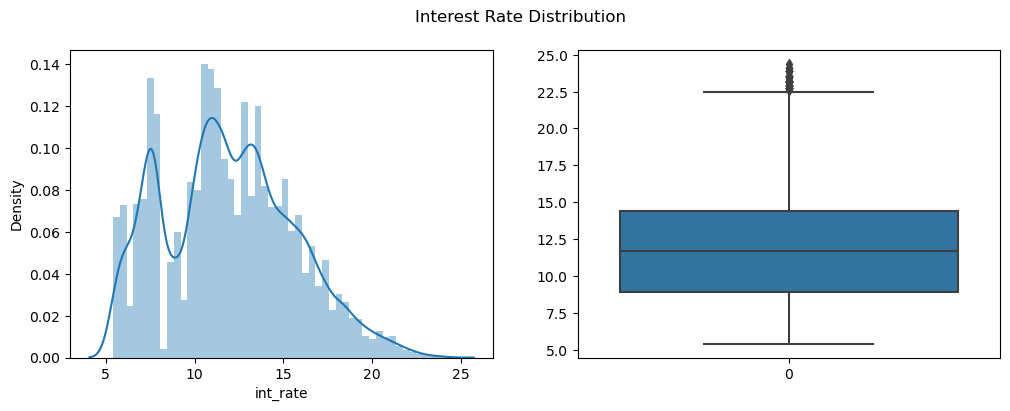

In [57]:
#Setting the figure size of plot
plt.figure(figsize=(12,4))

#Setting subplot index
#Histogram plot loan_amnt
plt.subplot(1,2,1)
sns.distplot(loan_df.int_rate)

#Box plot loan_amnt
plt.subplot(1,2,2)
sns.boxplot(loan_df.int_rate,orient='vertical')

#Title for both the plots
plt.suptitle('Interest Rate Distribution')
plt.show()

In [58]:
#Stats for int_rate
print("Median",loan_df.int_rate.median())
round(loan_df.int_rate.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]),1)


Median 11.71


count    38577.0
mean        11.9
std          3.7
min          5.4
25%          8.9
50%         11.7
75%         14.4
90%         16.8
95%         18.3
99%         21.0
max         24.4
Name: int_rate, dtype: float64

#### <span style="color:blue"> Observation </span>
From above plots, most people took loan with the interest rate ranging between 8.9% to 14.4% <br>
There are few people who have taken loans on higher interest rates of 22.5%

-----

### dti - Numerial Variable - Univariate Analysis

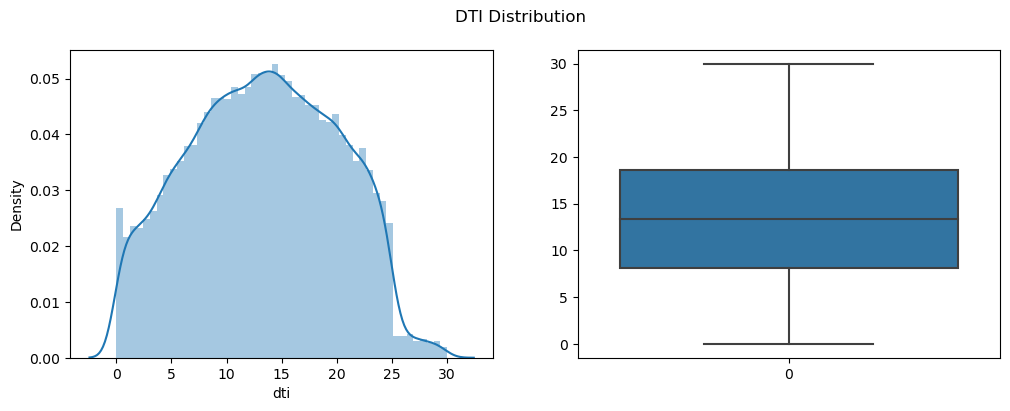

In [59]:
#Setting the figure size of plot
plt.figure(figsize=(12,4))

#Setting subplot index
#Histogram plot for dti
plt.subplot(1,2,1)
sns.distplot(loan_df.dti)

#Box plot dti
plt.subplot(1,2,2)
sns.boxplot(loan_df.dti,orient='vertical')

#Title for both the plots
plt.suptitle('DTI Distribution')
plt.show()

In [60]:
#Stats for dti
print("Median",loan_df.dti.median())
round(loan_df.dti.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]),1)


Median 13.37


count    38577.0
mean        13.3
std          6.7
min          0.0
25%          8.1
50%         13.4
75%         18.6
90%         22.3
95%         23.8
99%         26.5
max         30.0
Name: dti, dtype: float64

#### <span style="color:blue"> Observation </span>
The above distribution is similar to normal distribution<br>
There are no outliers<br>
The distribution shows that most borrowers has debt to income ratio within 30

----

### approved_loan_perc - Numerial Variable - Univariate Analysis

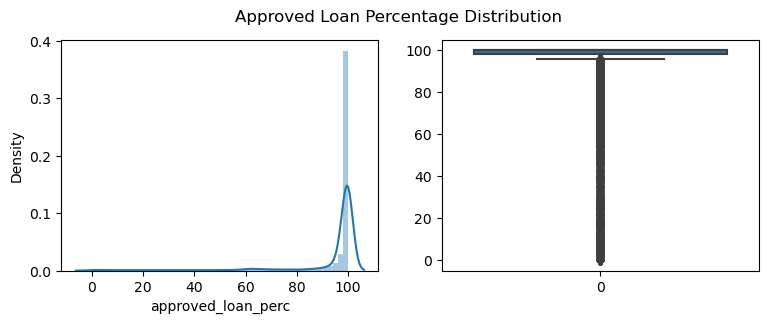

In [61]:
#Setting the figure size of plot
plt.figure(figsize=(9,3))

#Setting subplot index
#Histogram plot approved loan perc
plt.subplot(1,2,1)
sns.distplot(loan_df.approved_loan_perc)

#Box plot approved loan perc
plt.subplot(1,2,2)
sns.boxplot(loan_df.approved_loan_perc,orient='vertical')

#Title for both the plots
plt.suptitle('Approved Loan Percentage Distribution')
plt.show()

In [62]:
#Stats for approved loan percentae
print("Median",loan_df.approved_loan_perc.median())
round(loan_df.approved_loan_perc.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]),1)


Median 99.93


count    38577.0
mean        93.8
std         17.3
min          0.0
25%         98.2
50%         99.9
75%        100.0
90%        100.0
95%        100.0
99%        100.0
max        100.0
Name: approved_loan_perc, dtype: float64

#### <span style="color:blue"> Observation </span>
From above plots and stats, 75% borrower's loan were funded by investors

-----

### 'annual_inc' - Numerial Variable - Univariate Analysis

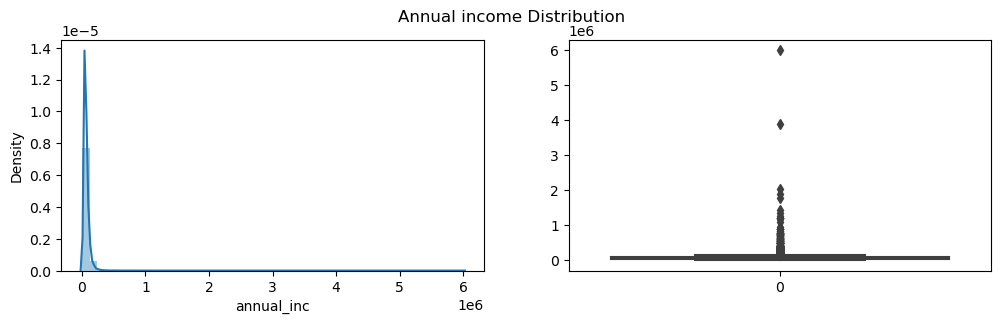

In [63]:
#Setting the figure size of plot
plt.figure(figsize=(12,3))

#Setting subplot index
#Histogram plot loan_amnt
plt.subplot(1,2,1)
sns.distplot(loan_df.annual_inc)

#Box plot loan_amnt
plt.subplot(1,2,2)
sns.boxplot(loan_df.annual_inc,orient='vertical')

#Title for both the plots
plt.suptitle('Annual income Distribution')
plt.show()

In [64]:
#Stats for int_rate
print("Median",loan_df.annual_inc.median())
round(loan_df.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]),1)

Median 58868.0


count      38577.0
mean       68778.0
std        64218.7
min         4000.0
25%        40000.0
50%        58868.0
75%        82000.0
90%       115000.0
95%       140004.0
99%       234144.0
max      6000000.0
Name: annual_inc, dtype: float64

<span style="color:blue">There is outlier data in the annual income column which is visible in the disribution plot above</span><br>
We need to remove/replace the outlier data

### OUTLIER Treatment for the annual income column

In [65]:
#check the stats
loan_df.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [66]:
# Removing the outliers
loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]
# check the stats again
print("Median",loan_df.annual_inc.median())
loan_df.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

Median 58000.0


count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
90%      111000.000000
95%      135000.000000
99%      189000.000000
max      234000.000000
Name: annual_inc, dtype: float64

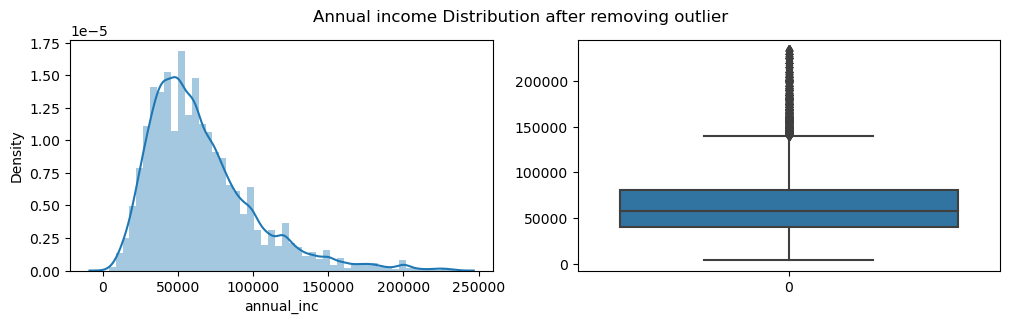

In [67]:
# Checking the Distribution again after removing the outliers
#Setting the figure size of plot
plt.figure(figsize=(12,3))

#Setting subplot index
#Histogram plot loan_amnt
plt.subplot(1,2,1)
sns.distplot(loan_df.annual_inc)

#Box plot loan_amnt
plt.subplot(1,2,2)
sns.boxplot(loan_df.annual_inc,orient='vertical')

#Title for both the plots
plt.suptitle('Annual income Distribution after removing outlier')
plt.show()

<Axes: xlabel='annual_inc_bins', ylabel='count'>

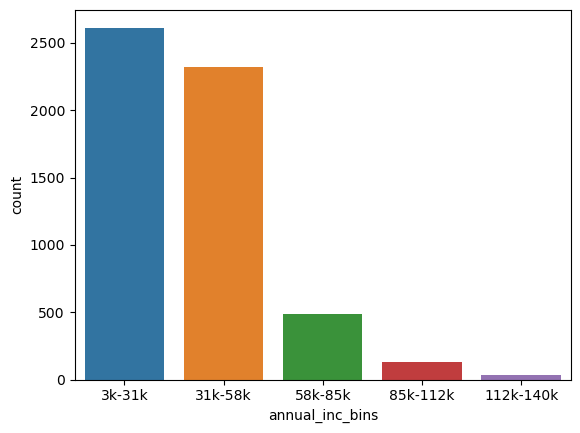

In [99]:
# visualizing the annual income groups
sns.countplot(x='annual_inc_bins', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### <span style="color:blue"> Observation </span>
From above term distribution, most people took loan whose salary is upto 30k

-----

### 'term' - Categorical Variable - Univariate Analysis

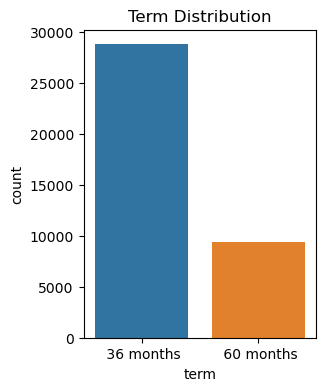

In [69]:
#Setting the figure size of plot
plt.figure(figsize=(3,4))

#Countplot for term
sns.countplot(x='term', data = loan_df)
#Title for the plot
plt.title('Term Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
From above term distribution, most people took loan for 36 months duration

---------------------

### 'grade' - Categorical Variable - Univariate Analysis <br> & 'sub_grade' - Categorical Variable - Univariate Analysis

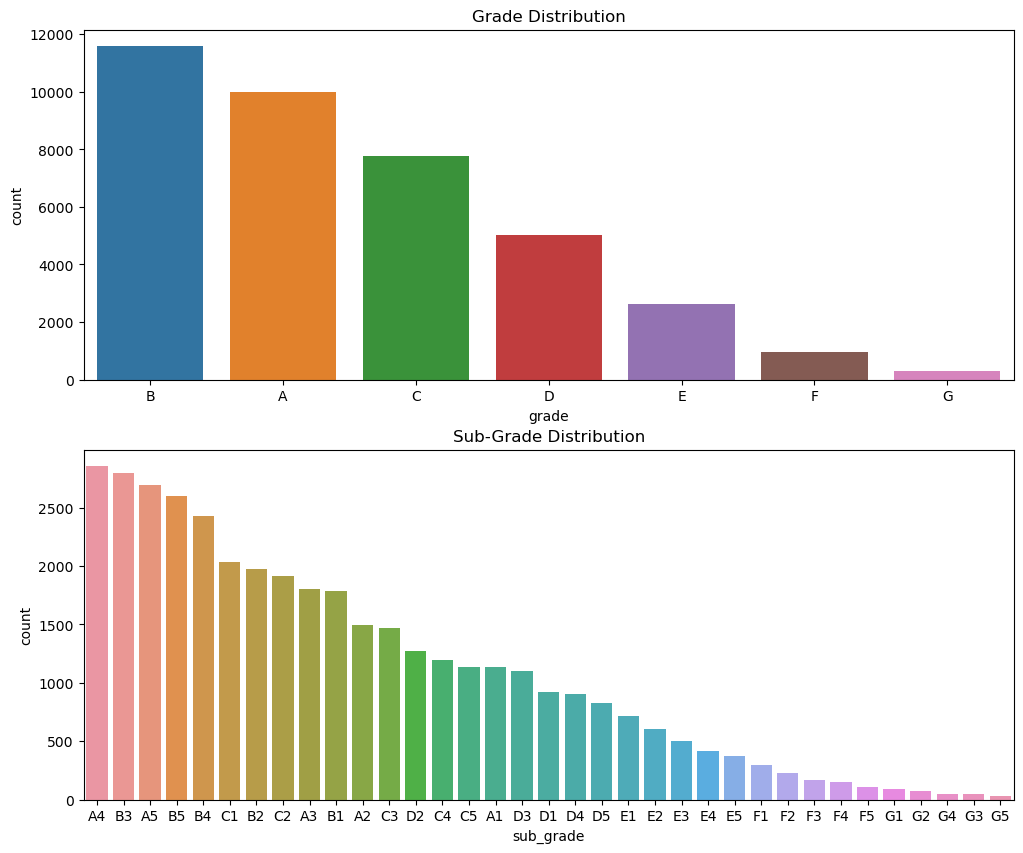

In [70]:
#Setting the figure size of plot
plt.figure(figsize=(12,10))

#Countplot for grade
plt.subplot(2,1,1)
sns.countplot(x='grade', data = loan_df, order=loan_df['grade'].value_counts().index)
#Title for the subplot grade
plt.title('Grade Distribution')

#Countplot for sub-grade
plt.subplot(2,1,2)
sns.countplot(x='sub_grade', data = loan_df,order=loan_df['sub_grade'].value_counts().index)
#Title for the subplot sub-grade
plt.title('Sub-Grade Distribution')

plt.show()

#### <span style="color:blue"> Observation </span>
From above Grade & Sub-Grade distribution, most loans were applied under grade A and B <br>
Also most loans were applied under sub grades - A4&B3

-----

### 'home_ownership' - Categorical Variable - Univariate Analysis 

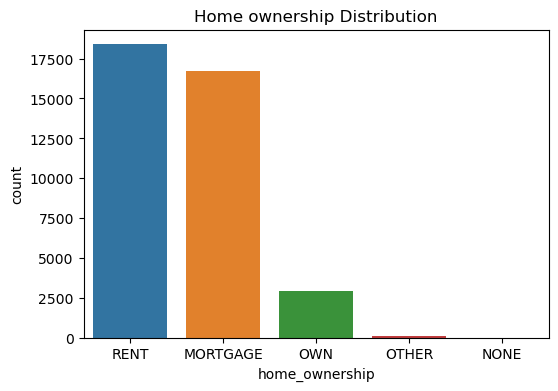

In [71]:
#Setting the figure size of plot
plt.figure(figsize=(6,4))

#Countplot for home_ownership
#sns.countplot(loan_df['term'])
sns.countplot(x='home_ownership', data = loan_df,order=loan_df['home_ownership'].value_counts().index)
#Title for the plot
plt.title('Home ownership Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
From above home ownership distribution, most loans were applied where Borrower have Rented home, followed by borrowers who have mortgage. <br>

-----

### 'verification_status' - Categorical Variable - Univariate Analysis 

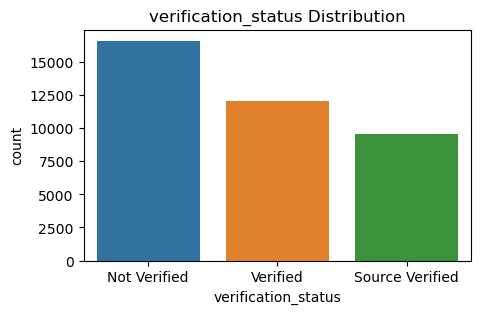

In [72]:
#Setting the figure size of plot
plt.figure(figsize=(5,3))

#Countplot for verification_status
sns.countplot(x='verification_status', data = loan_df,order=loan_df['verification_status'].value_counts().index)
#Title for the plot
plt.title('verification_status Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
From above verification status distribution, most loans were given without borrowers income verification <br>
If we add Verified (verified by LC) and Source Verified cases then overall Verified is more than Non Verified cases.

------

### 'addr_state' - Categorical Variable - Univariate Analysis 

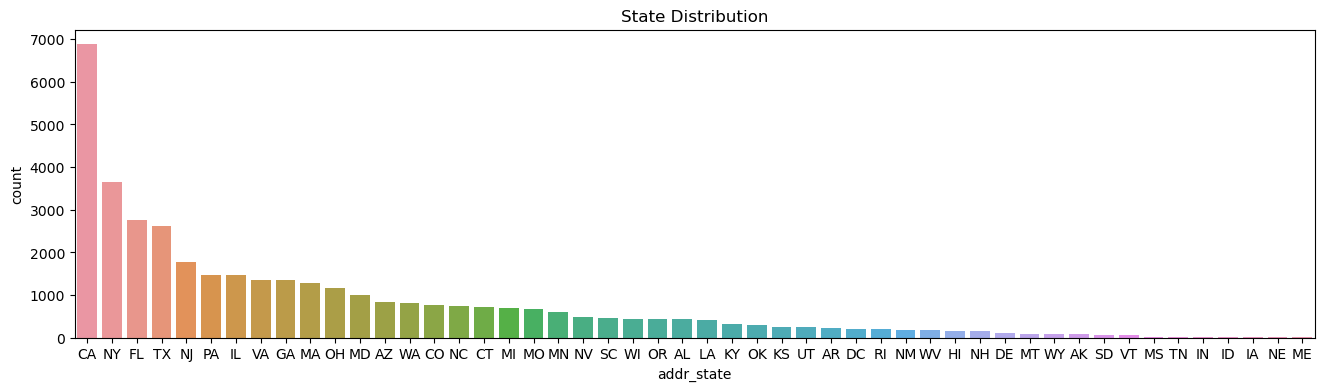

In [73]:
#Setting the figure size of plot
plt.figure(figsize=(16,4))

#Countplot for addr_state
sns.countplot(x='addr_state', data = loan_df,order=loan_df['addr_state'].value_counts().index)
#Title for the plot
plt.title('State Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
From above State ownership distribution, most loans were applied from states - CA and NY

----

### 'issue_year' - Categorical Variable - Univariate Analysis <br>& ### 'issue_month' - Categorical Variable - Univariate Analysis 

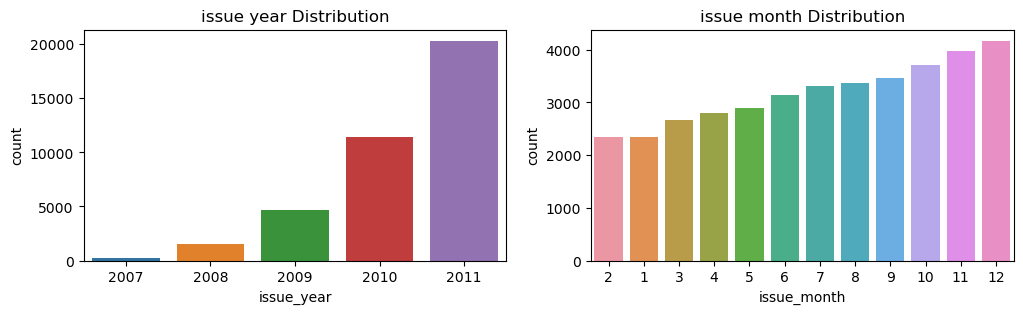

In [74]:
#Setting the figure size of plot
plt.figure(figsize=(12,3))

#Countplot for issue_year
#subplot for issue_year
plt.subplot(1,2,1)
sns.countplot(x='issue_year', data = loan_df,order=loan_df['issue_year'].value_counts(ascending=True).index)
#Title for the plot
plt.title('issue year Distribution')

#Countplot for issue_month
#subplot for issue_month
plt.subplot(1,2,2)
sns.countplot(x='issue_month', data = loan_df,order=loan_df['issue_month'].value_counts(ascending=True).index)
#Title for the plot
plt.title('issue month Distribution')

plt.show()

#### <span style="color:blue"> Observation </span>
From above issue year distribution, the loans have increased year on year almost double<br>
Most loans were borrowed in last couple of months (Nov,Dec) , this might by due to festival holiday season.

-----

### 'purpose' - Categorical Variable - Univariate Analysis 

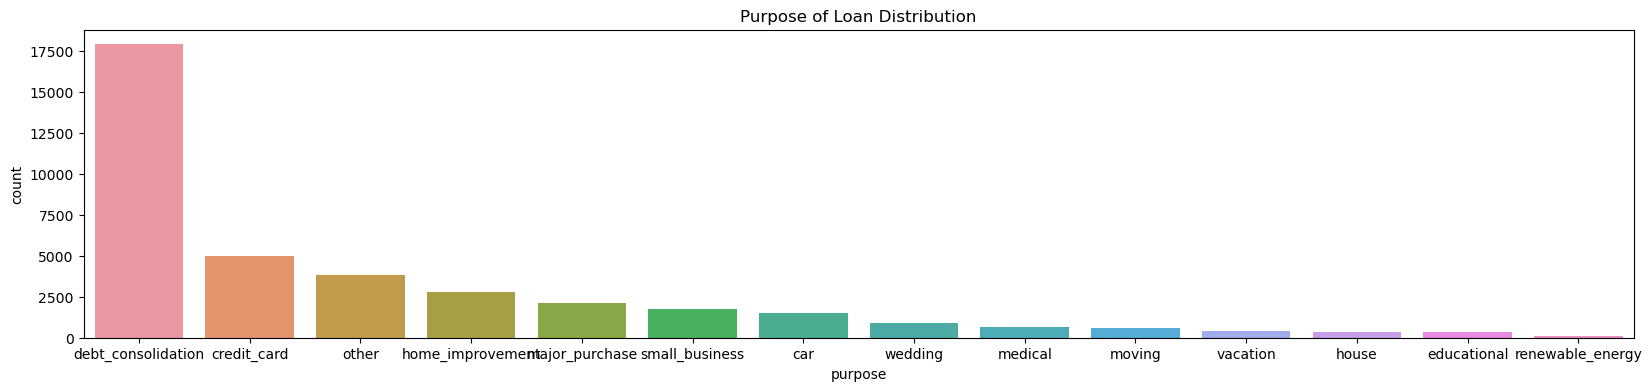

In [75]:
#Setting the figure size of plot
plt.figure(figsize=(20,4))

#Countplot for purpose
sns.countplot(x='purpose', data = loan_df,order=loan_df['purpose'].value_counts().index)
#Title for the plot
plt.title('Purpose of Loan Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
The Purpose of most loan application was for debt consolidation followed by credit card

-----

### 'emp_length' - Categorical Variable - Univariate Analysis 

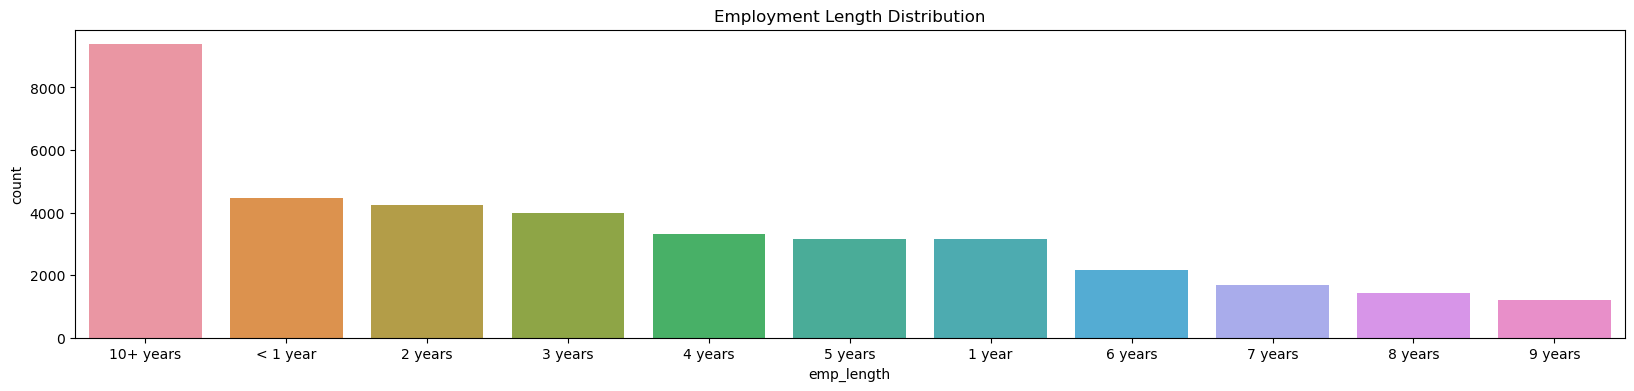

In [76]:
#Setting the figure size of plot
plt.figure(figsize=(20,4))

#Countplot for employment length 
sns.countplot(x='emp_length', data = loan_df,order=loan_df['emp_length'].value_counts().index)
#Title for the plot
plt.title('Employment Length Distribution')
plt.show()

#### <span style="color:blue"> Observation </span>
The employment length for most borrowers is more than 10 years

-----

## Segmented Univariate Analysis
We will analyze how different categories in a categorical variable varies with respect to other numerical variables

### Loan Status Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'Loan Status vs DTI')

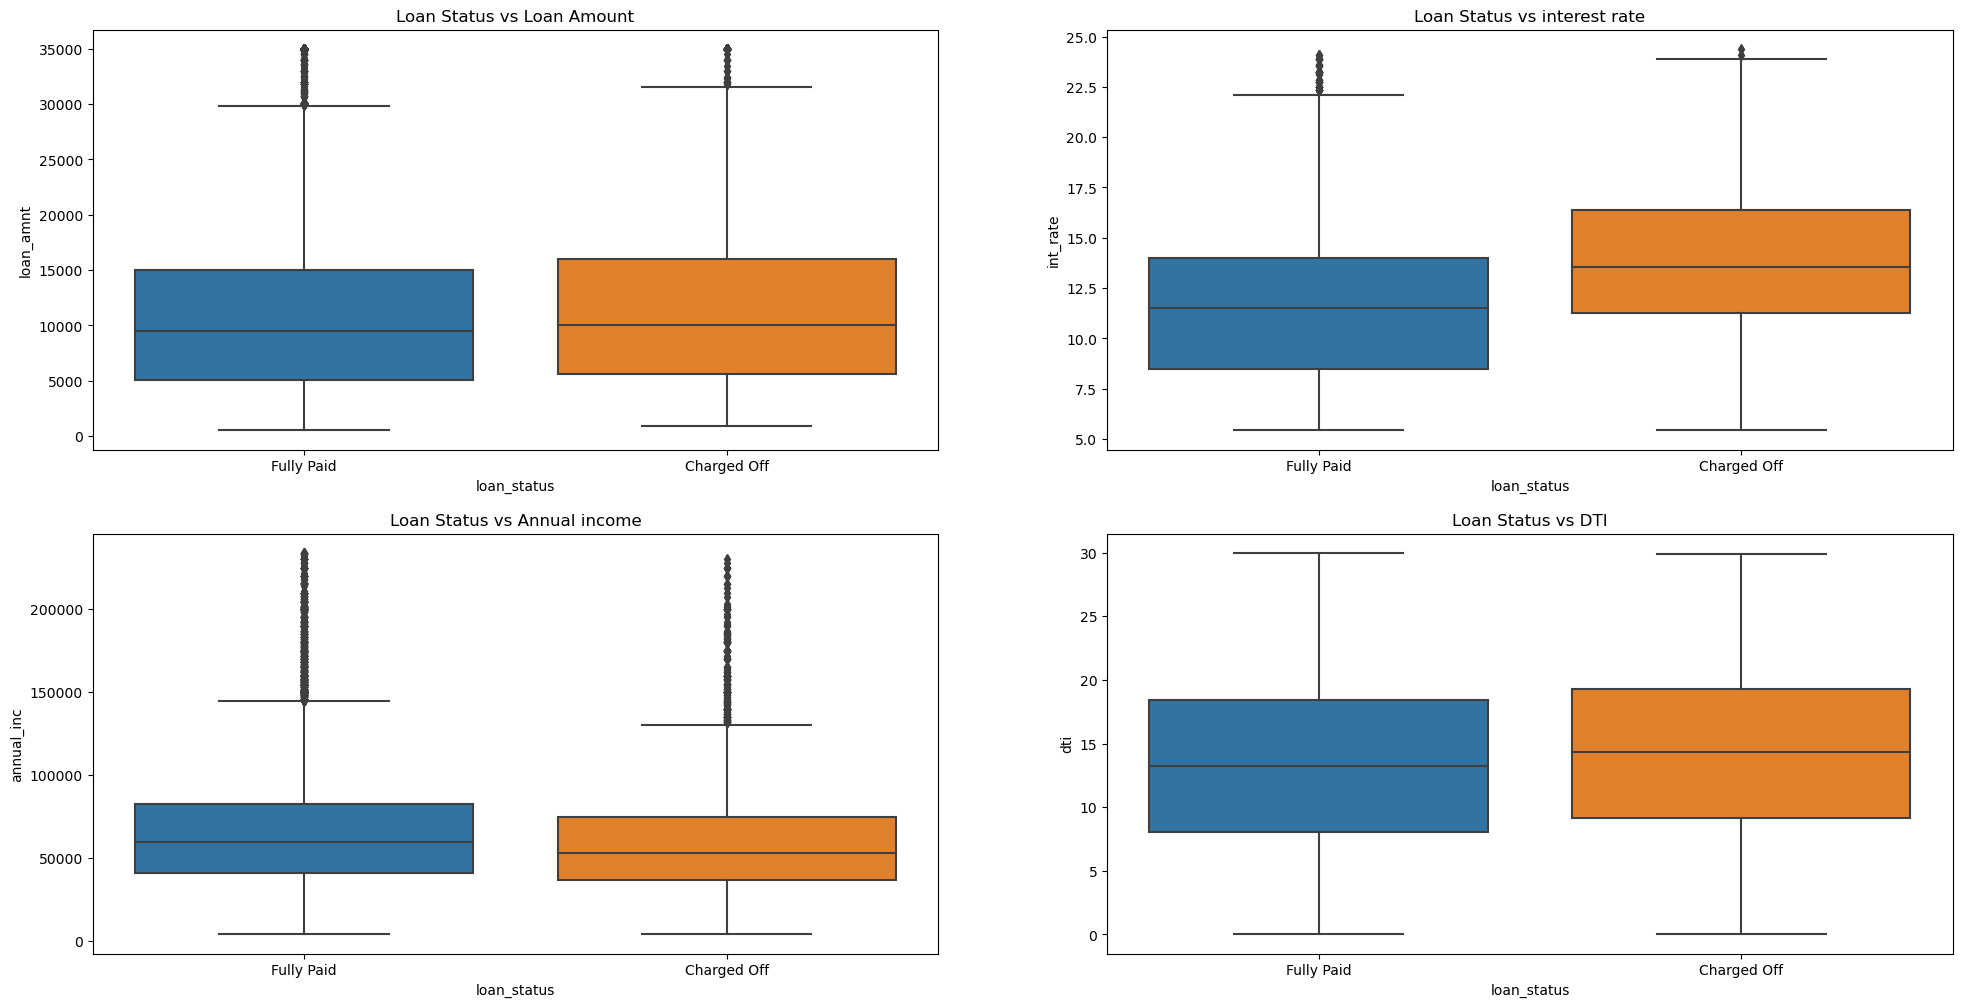

In [77]:
plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
sns.boxplot(x='loan_status', y=loan_df.loan_amnt, data=loan_df)
plt.title('Loan Status vs Loan Amount')

plt.subplot(2,2,2)
plt.title('Loan Status vs interest rate')
sns.boxplot(x='loan_status', y=loan_df.int_rate, data=loan_df)

plt.subplot(2,2,3)
sns.boxplot(x='loan_status', y=loan_df.annual_inc, data=loan_df)
plt.title('Loan Status vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='loan_status', y=loan_df.dti, data=loan_df)
plt.title('Loan Status vs DTI')



#### <span style="color:blue"> Observation </span>
Charged Off loans have higher loan amounts than Fully Paid ones <br>
Fully Paid loans have higher annual income than charged off ones<br>
Interest rate for charged off loans is higher than Fully paid loans<br>
DTI is higher for charged off than Fully paid ones


-----

### term Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'Term vs DTI')

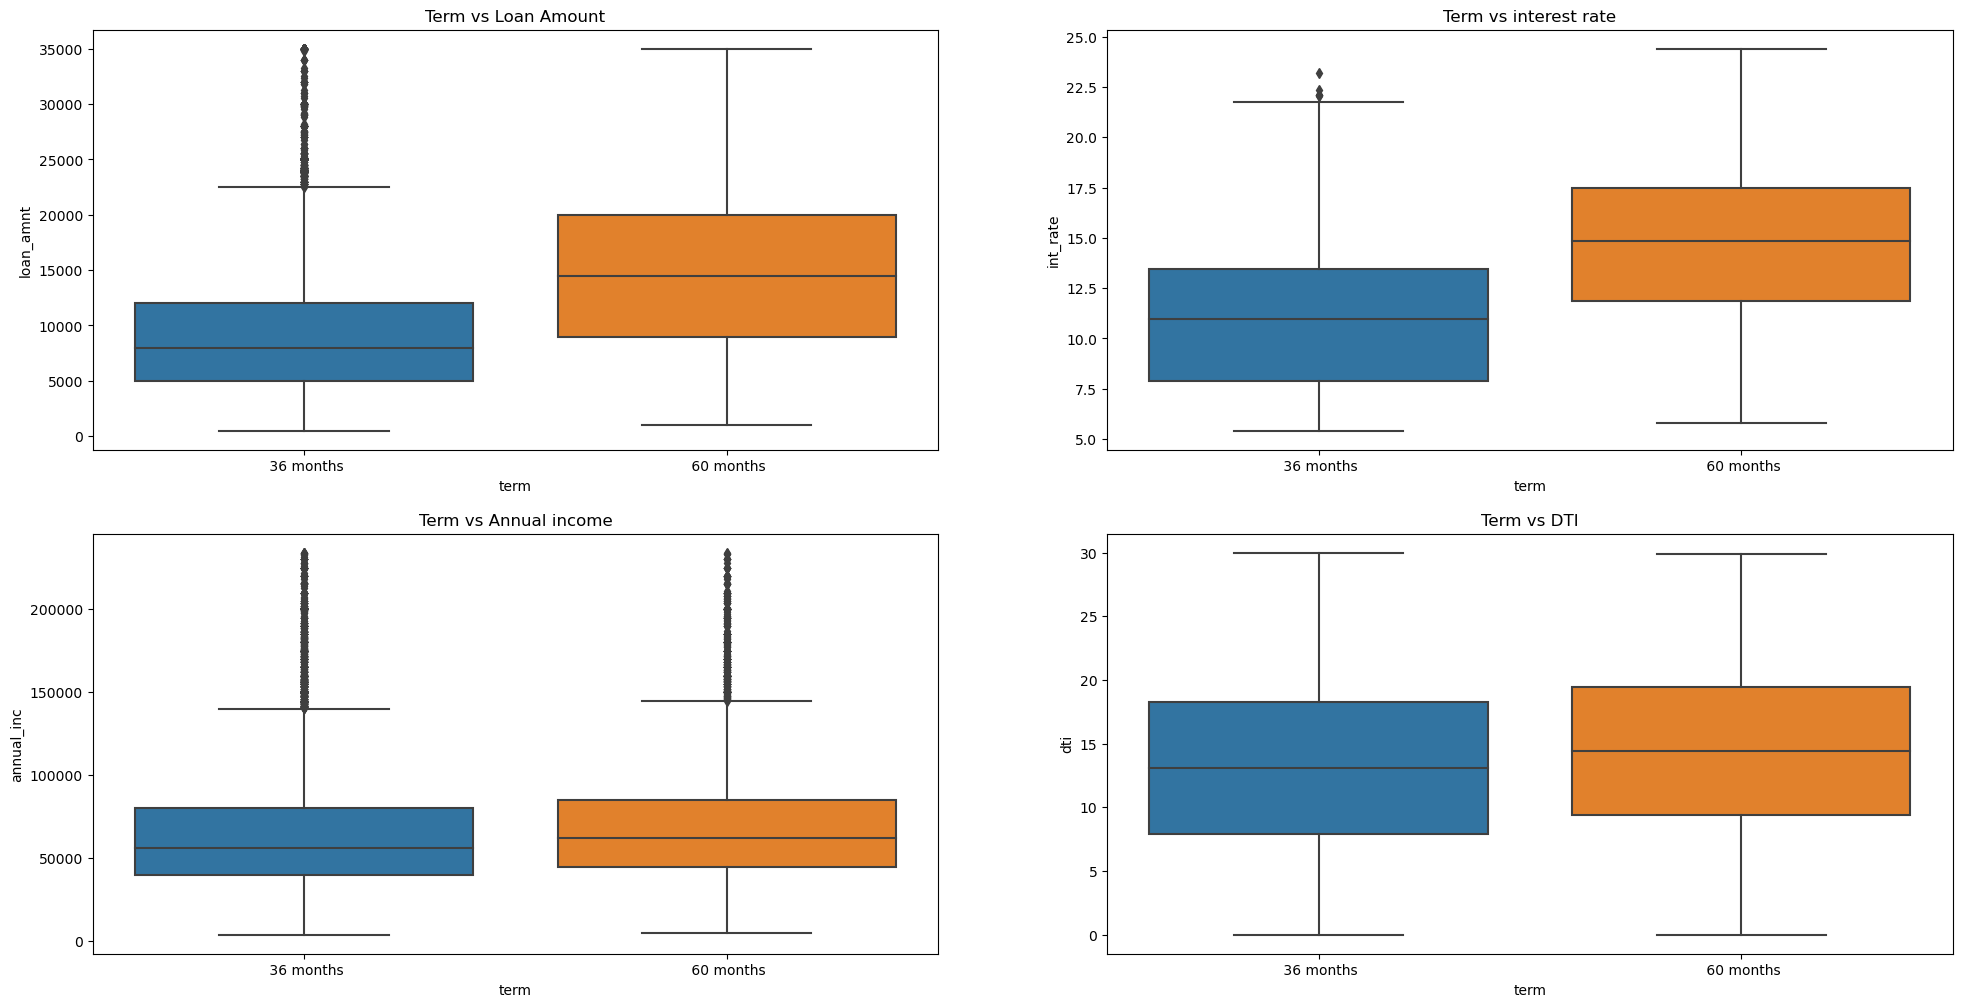

In [78]:
plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
sns.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df)
plt.title('Term vs Loan Amount')

plt.subplot(2,2,2)
plt.title('Term vs interest rate')
sns.boxplot(x='term', y=loan_df.int_rate, data=loan_df)

plt.subplot(2,2,3)
sns.boxplot(x='term', y=loan_df.annual_inc, data=loan_df)
plt.title('Term vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='term', y=loan_df.dti, data=loan_df)
plt.title('Term vs DTI')

#### <span style="color:blue"> Observation </span>
Loan Amount for 60 months Term is higher than 36 months <br>
Loan Interest rate for 60 months term is higher than 36 months<br>
Annual income of borrowers is slightly higher for 60 months loan as compared to 36 months<br>
DTI for 60 months term loan is higher than 36 months term

-----

### purpose Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'purpose vs DTI')

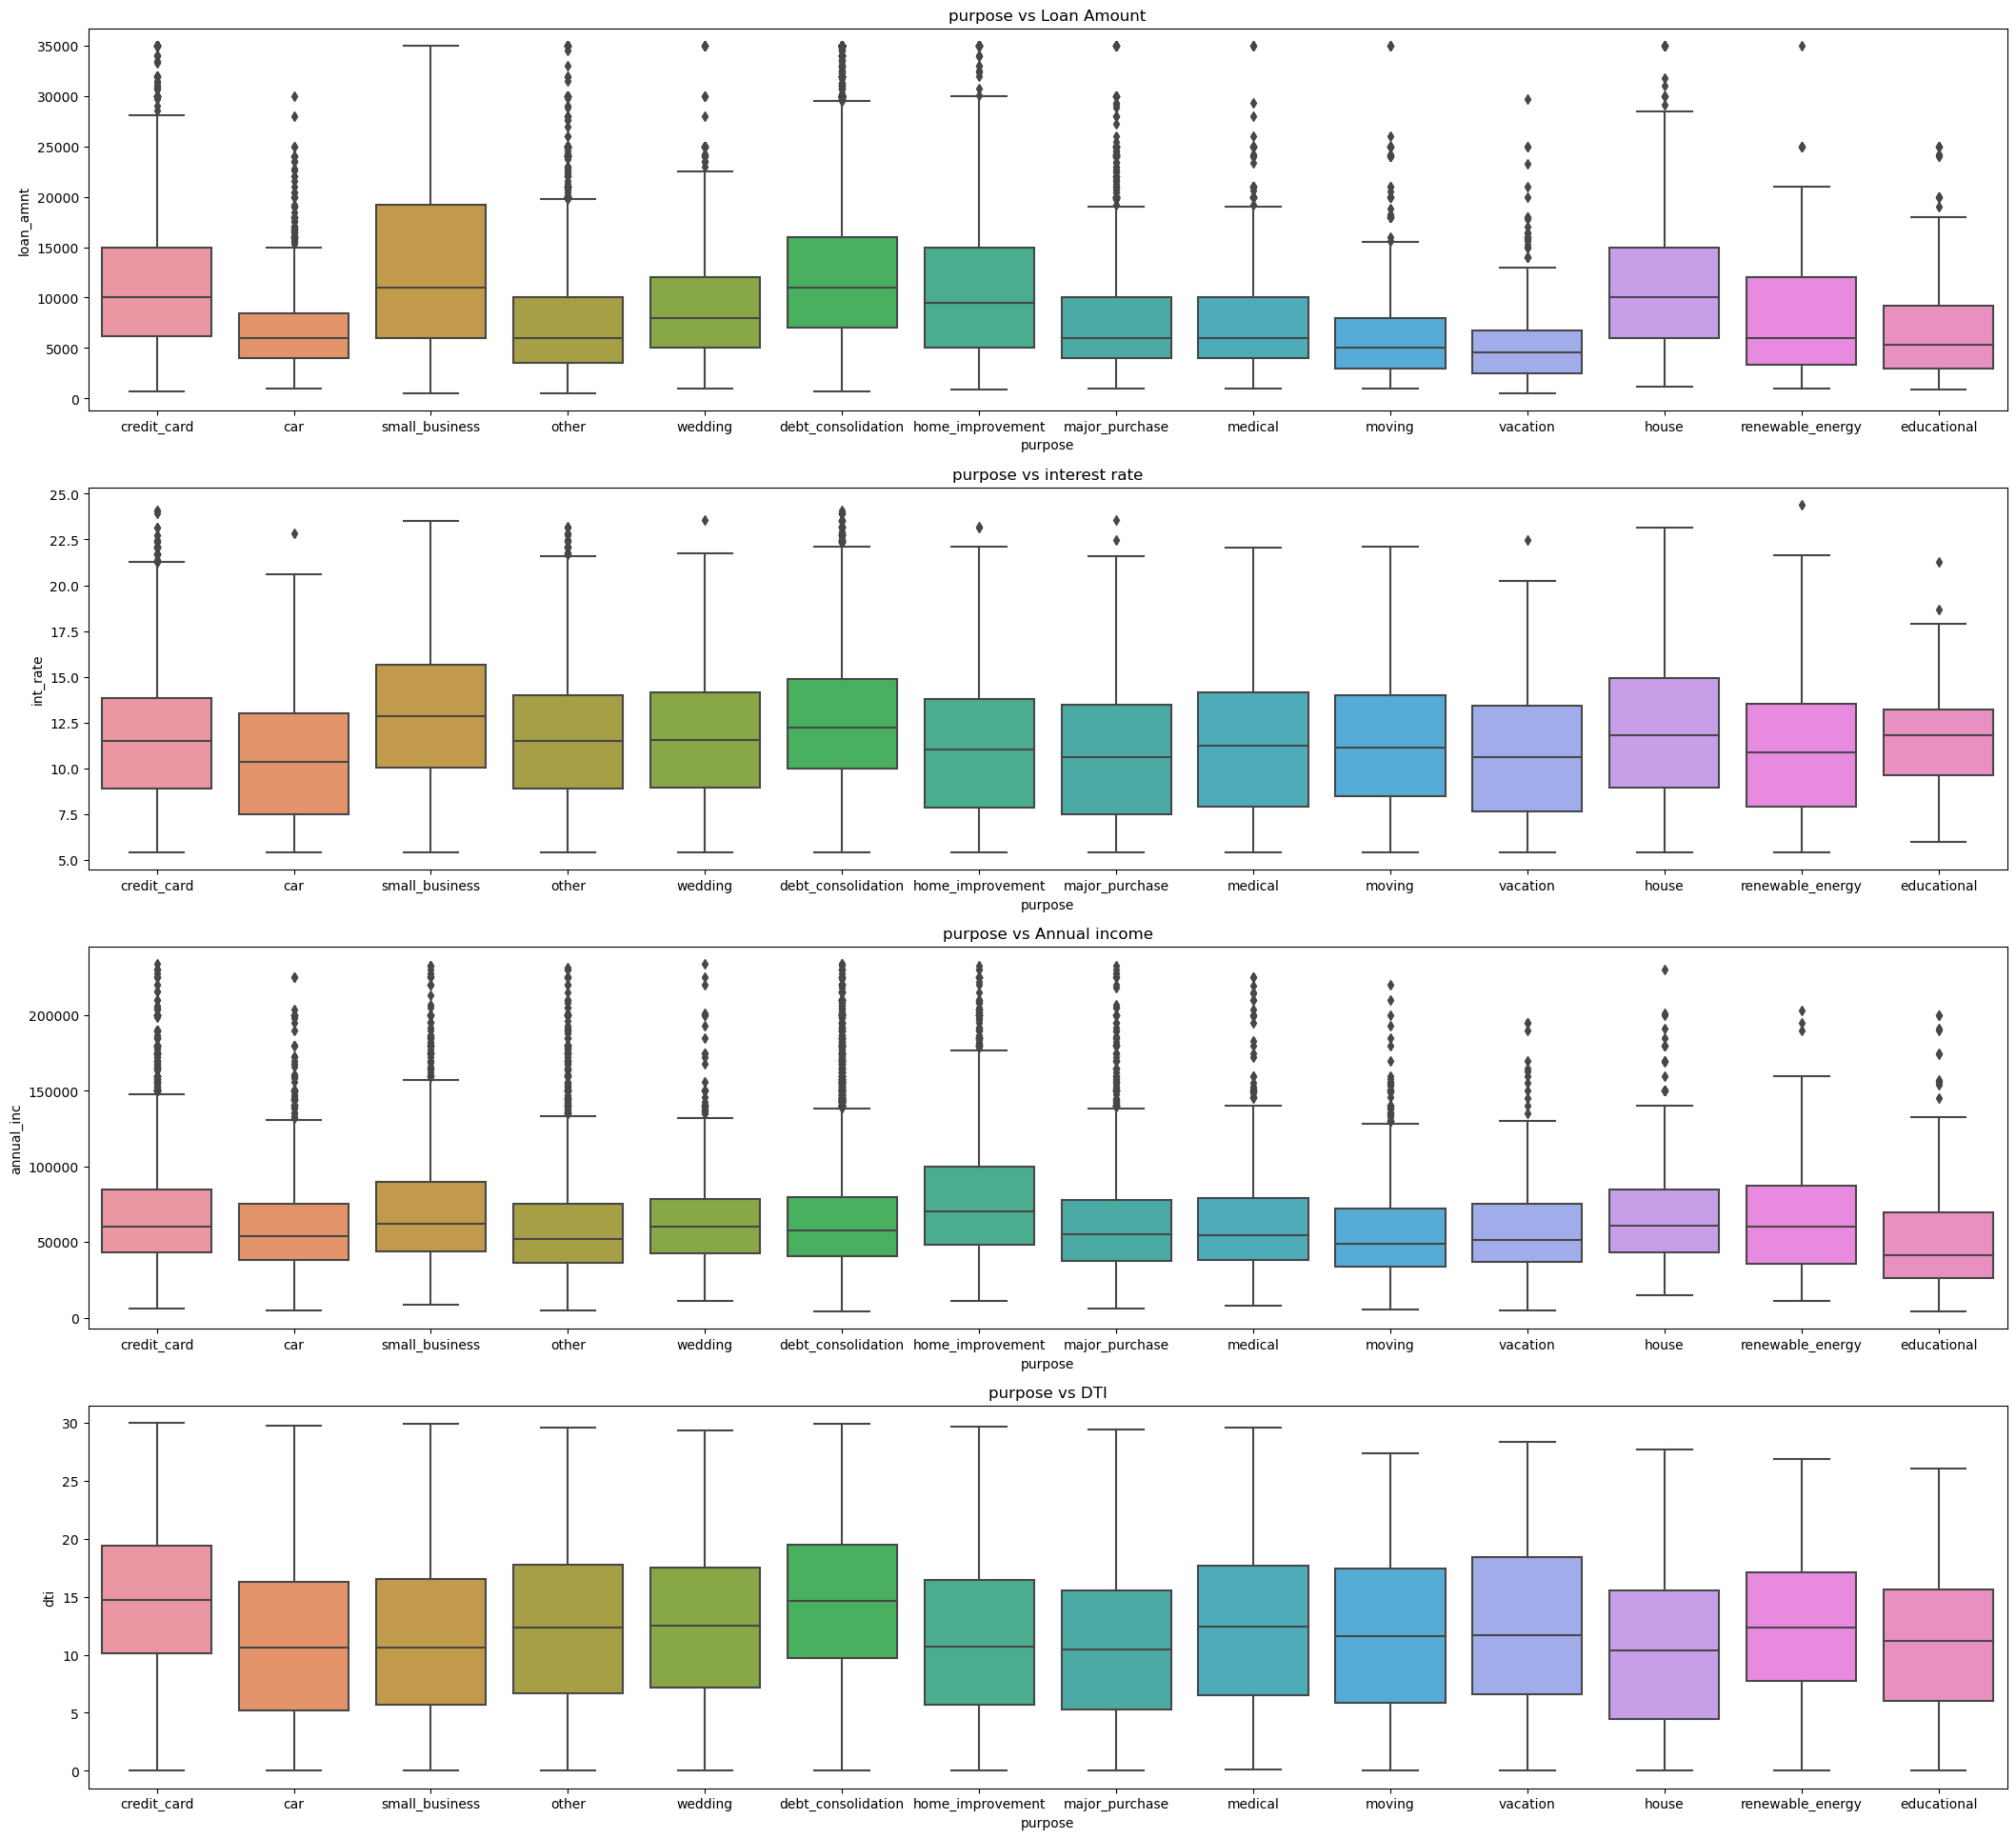

In [79]:
plt.figure(figsize=(26,24))

plt.subplot(4,1,1)
sns.boxplot(x='purpose', y=loan_df.loan_amnt, data=loan_df)
plt.title('purpose vs Loan Amount')

plt.subplot(4,1,2)
plt.title('purpose vs interest rate')
sns.boxplot(x='purpose', y=loan_df.int_rate, data=loan_df)

plt.subplot(4,1,3)
sns.boxplot(x='purpose', y=loan_df.annual_inc, data=loan_df)
plt.title('purpose vs Annual income')

plt.subplot(4,1,4)
sns.boxplot(x='purpose', y=loan_df.dti, data=loan_df)
plt.title('purpose vs DTI')

#### <span style="color:blue"> Observation </span>
Small businesses were given highest mean loan amount, also various range of loan amount were given to Small businesses<br>
Loan purpose of Small businesses and Debt consolidation were offered highest interest rates<br>
Annual income for borrowers is highest for loan purpose of home improvements<br>
DTI is highest for debt_consolidation



-------

### Home ownership Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'home_ownership vs DTI')

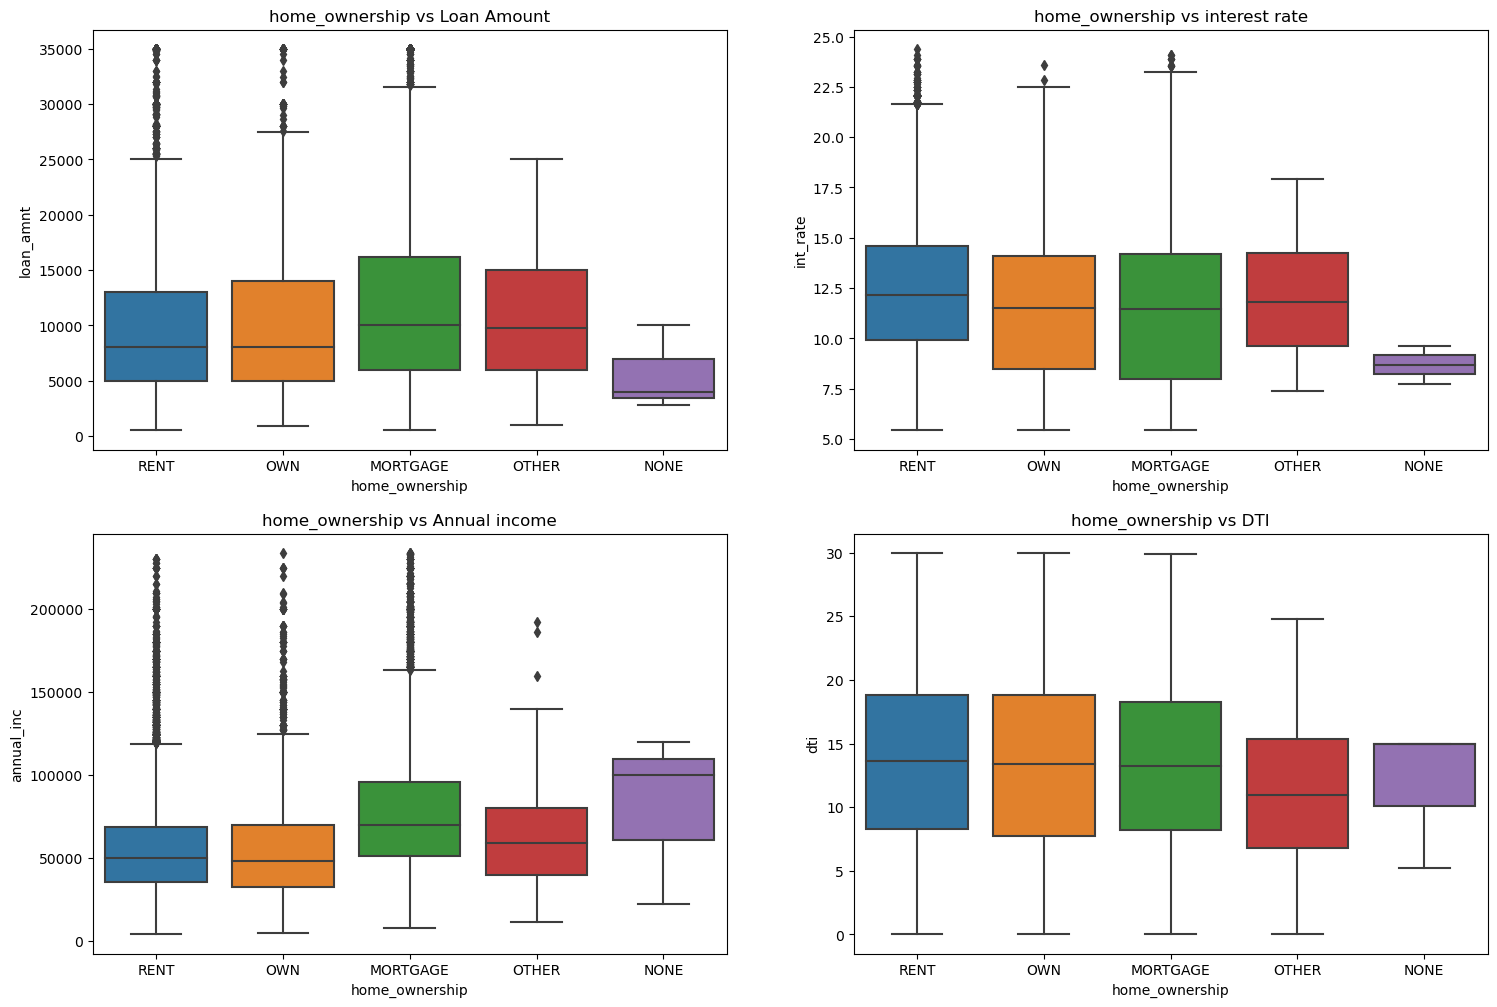

In [80]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df)
plt.title('home_ownership vs Loan Amount')

plt.subplot(2,2,2)
plt.title('home_ownership vs interest rate')
sns.boxplot(x='home_ownership', y=loan_df.int_rate, data=loan_df)

plt.subplot(2,2,3)
sns.boxplot(x='home_ownership', y=loan_df.annual_inc, data=loan_df)
plt.title('home_ownership vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='home_ownership', y=loan_df.dti, data=loan_df)
plt.title('home_ownership vs DTI')

#### <span style="color:blue"> Observation </span>
highest loan amount was offered to borrowers with Mortgage<br>
highest interest rate is for rented borrowers<br>
Borrowers with mortgage were offered varied interest rates ranges<br>
DTI is almost same across borrowers with Rent,Own and Mortgage 

---

### Verification status Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'verification_status vs DTI')

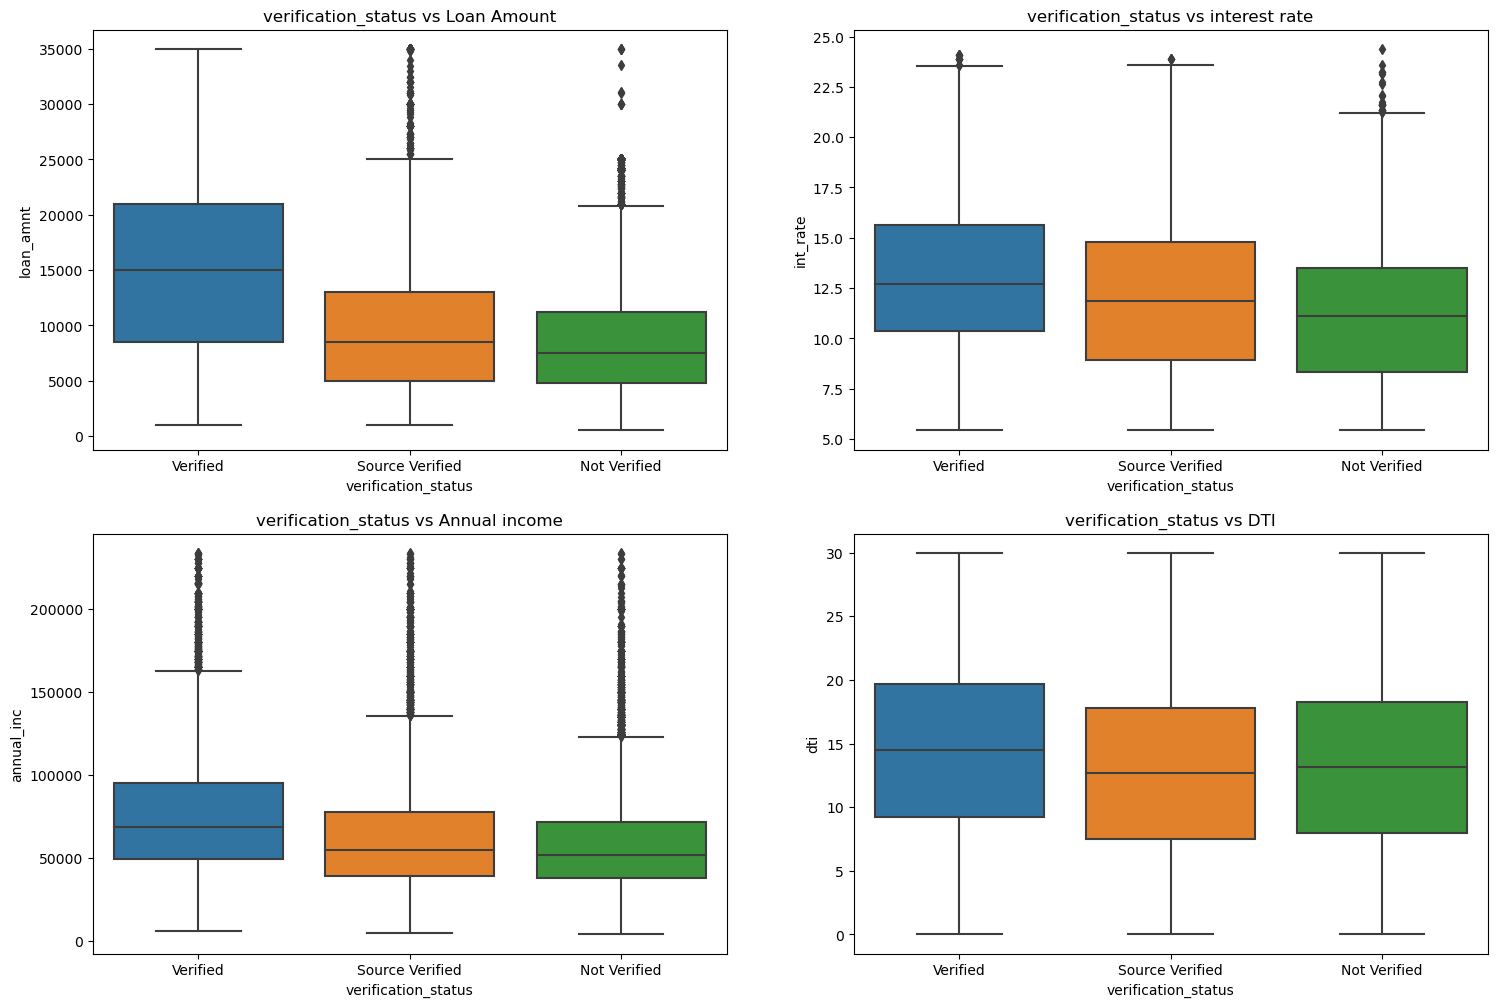

In [81]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.boxplot(x='verification_status', y=loan_df.loan_amnt, data=loan_df)
plt.title('verification_status vs Loan Amount')

plt.subplot(2,2,2)
plt.title('verification_status vs interest rate')
sns.boxplot(x='verification_status', y=loan_df.int_rate, data=loan_df)

plt.subplot(2,2,3)
sns.boxplot(x='verification_status', y=loan_df.annual_inc, data=loan_df)
plt.title('verification_status vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='verification_status', y=loan_df.dti, data=loan_df)
plt.title('verification_status vs DTI')

#### <span style="color:blue"> Observation </span>
Lowest loan amount was lended for Not verified borrowers.Highest amount were given to Verified borrowers.<br>
interest rate is lowest for not verifed cases as compared to verified cases <br>
DTI is highest for Verified cases<br>
annual income is highest for Verfied cases<br>

-----

### Grade Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'grade vs DTI')

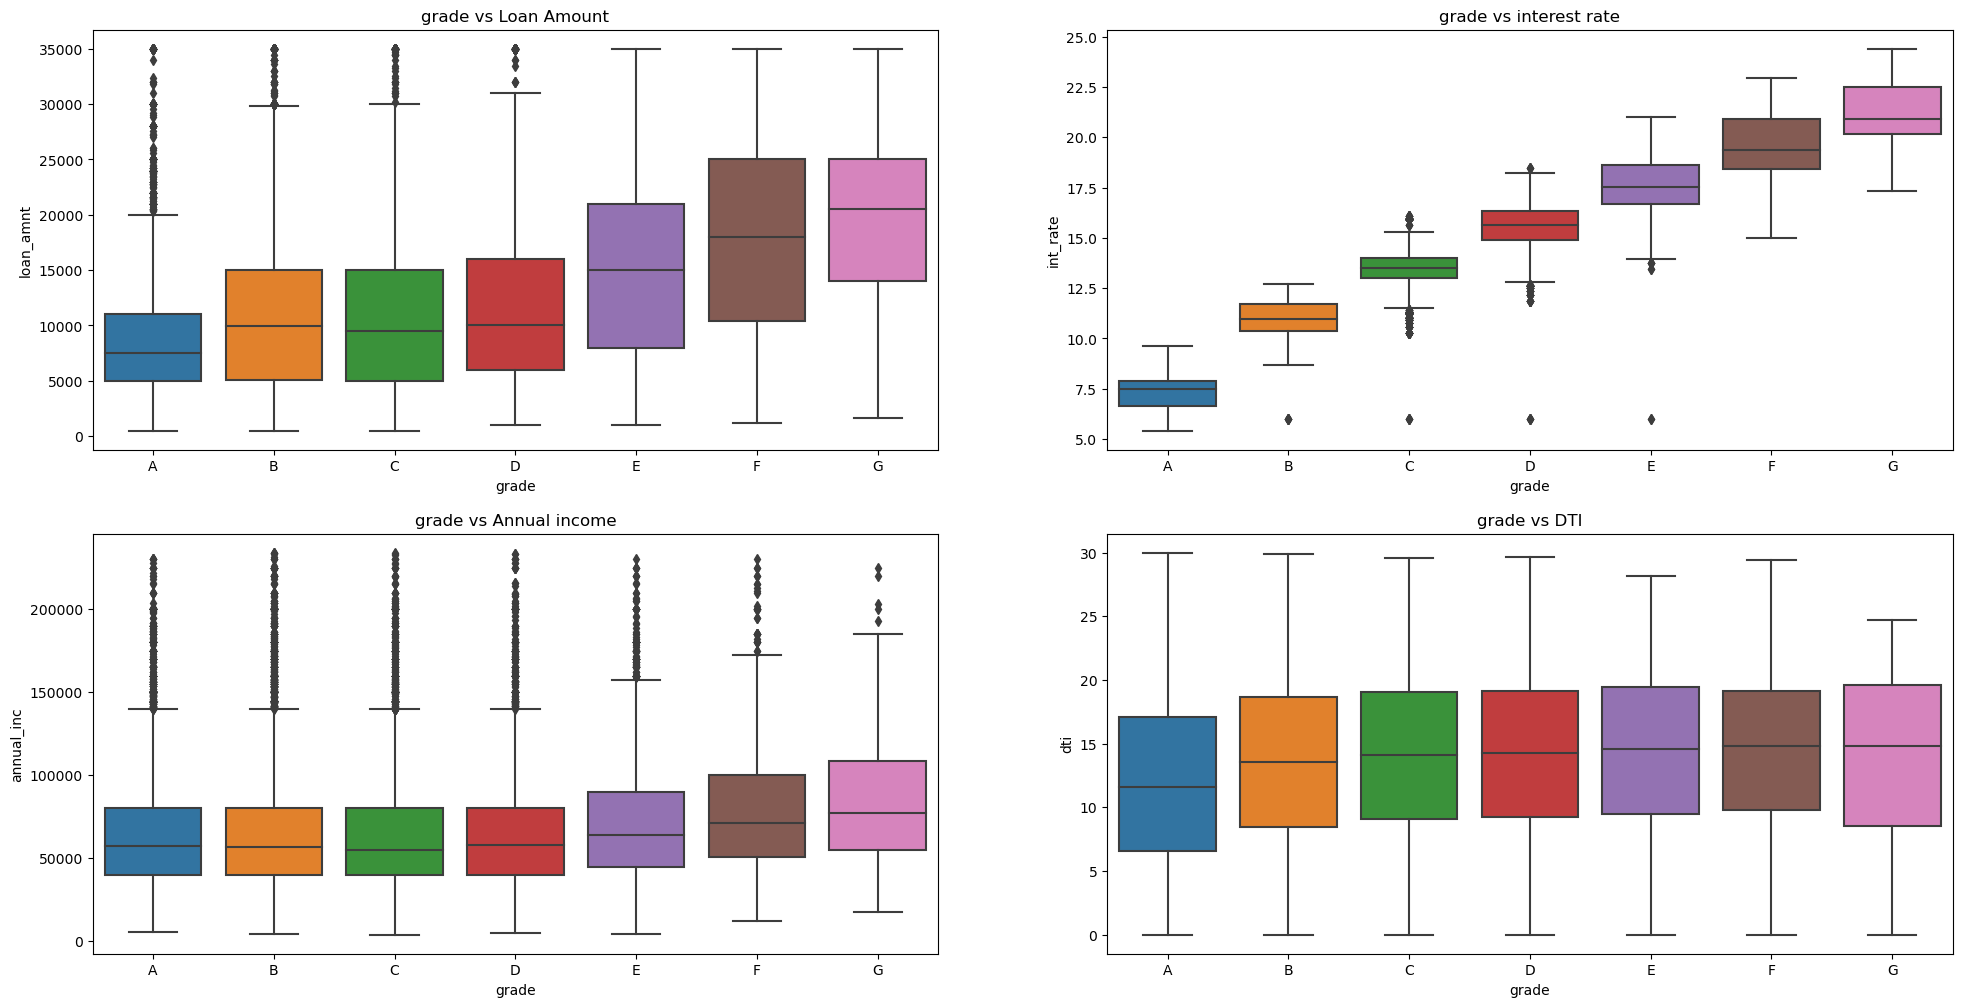

In [82]:
plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
sns.boxplot(x='grade', y=loan_df.loan_amnt, data=loan_df,order=['A','B','C','D','E','F','G'])
plt.title('grade vs Loan Amount')

plt.subplot(2,2,2)
plt.title('grade vs interest rate')
sns.boxplot(x='grade', y=loan_df.int_rate, data=loan_df,order=['A','B','C','D','E','F','G'])

plt.subplot(2,2,3)
sns.boxplot(x='grade', y=loan_df.annual_inc, data=loan_df,order=['A','B','C','D','E','F','G'])
plt.title('grade vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='grade', y=loan_df.dti, data=loan_df,order=['A','B','C','D','E','F','G'])
plt.title('grade vs DTI')

#### <span style="color:blue"> Observation </span>
Loan amount is highest for grade G followed by grade F. As the Grade decreases the loan amount increased<br>
Interest rate increases from Grade A to G. Diverese interest rates present for lower grades F,G<br>
lower grades have diverse annual incomes<br>
DTI is least for Grade A borrowers

----

### emp_length Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'emp_length vs DTI')

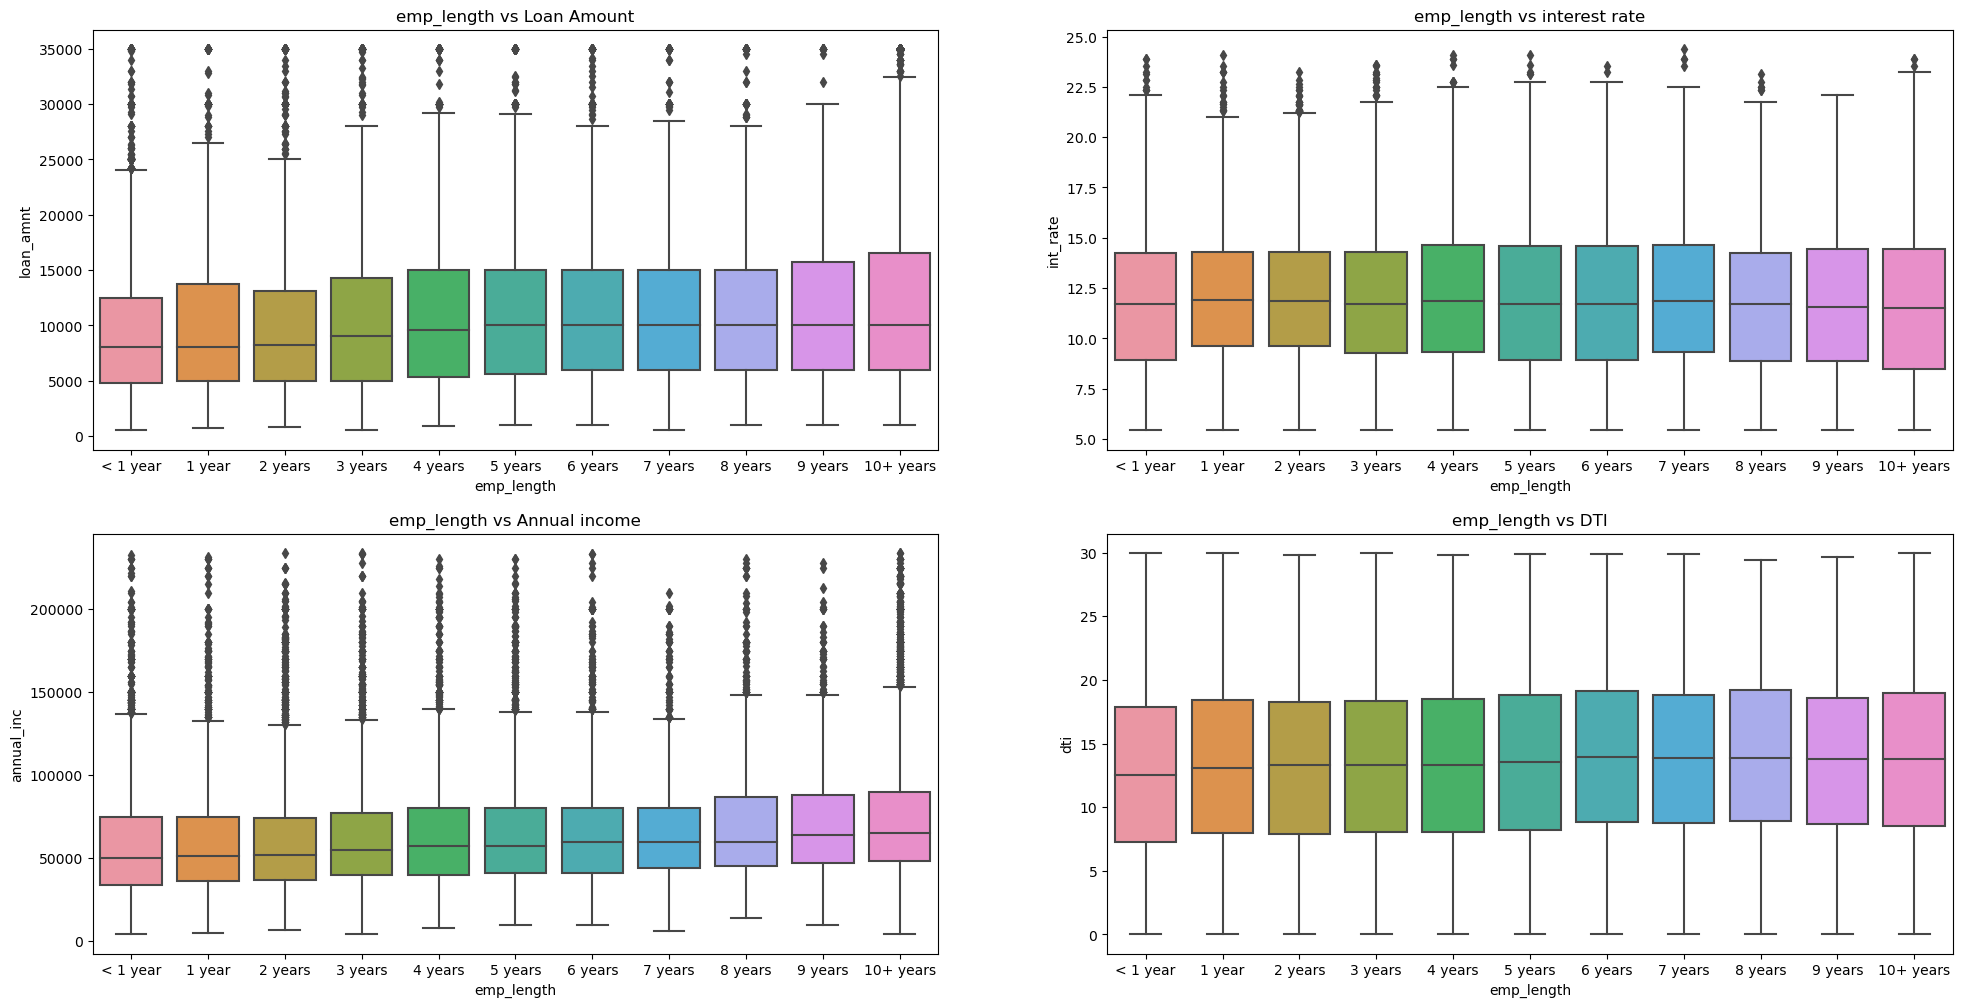

In [83]:
plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
sns.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])
plt.title('emp_length vs Loan Amount')

plt.subplot(2,2,2)
plt.title('emp_length vs interest rate')
sns.boxplot(x='emp_length', y=loan_df.int_rate, data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])

plt.subplot(2,2,3)
sns.boxplot(x='emp_length', y=loan_df.annual_inc, data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])
plt.title('emp_length vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='emp_length', y=loan_df.dti, data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])
plt.title('emp_length vs DTI')

#### <span style="color:blue"> Observation </span>
mean loan for 10+ years employment length is highest. Loan Amount increased with employment length<br>
annual income for 10+ years is highest<br>
no specific pattern observed in interest rate for all the employment length groups<br>
DTI is highest for 10+ years and lowest for the emplyment length upto 1 year<br>

-----

### state Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'State vs DTI')

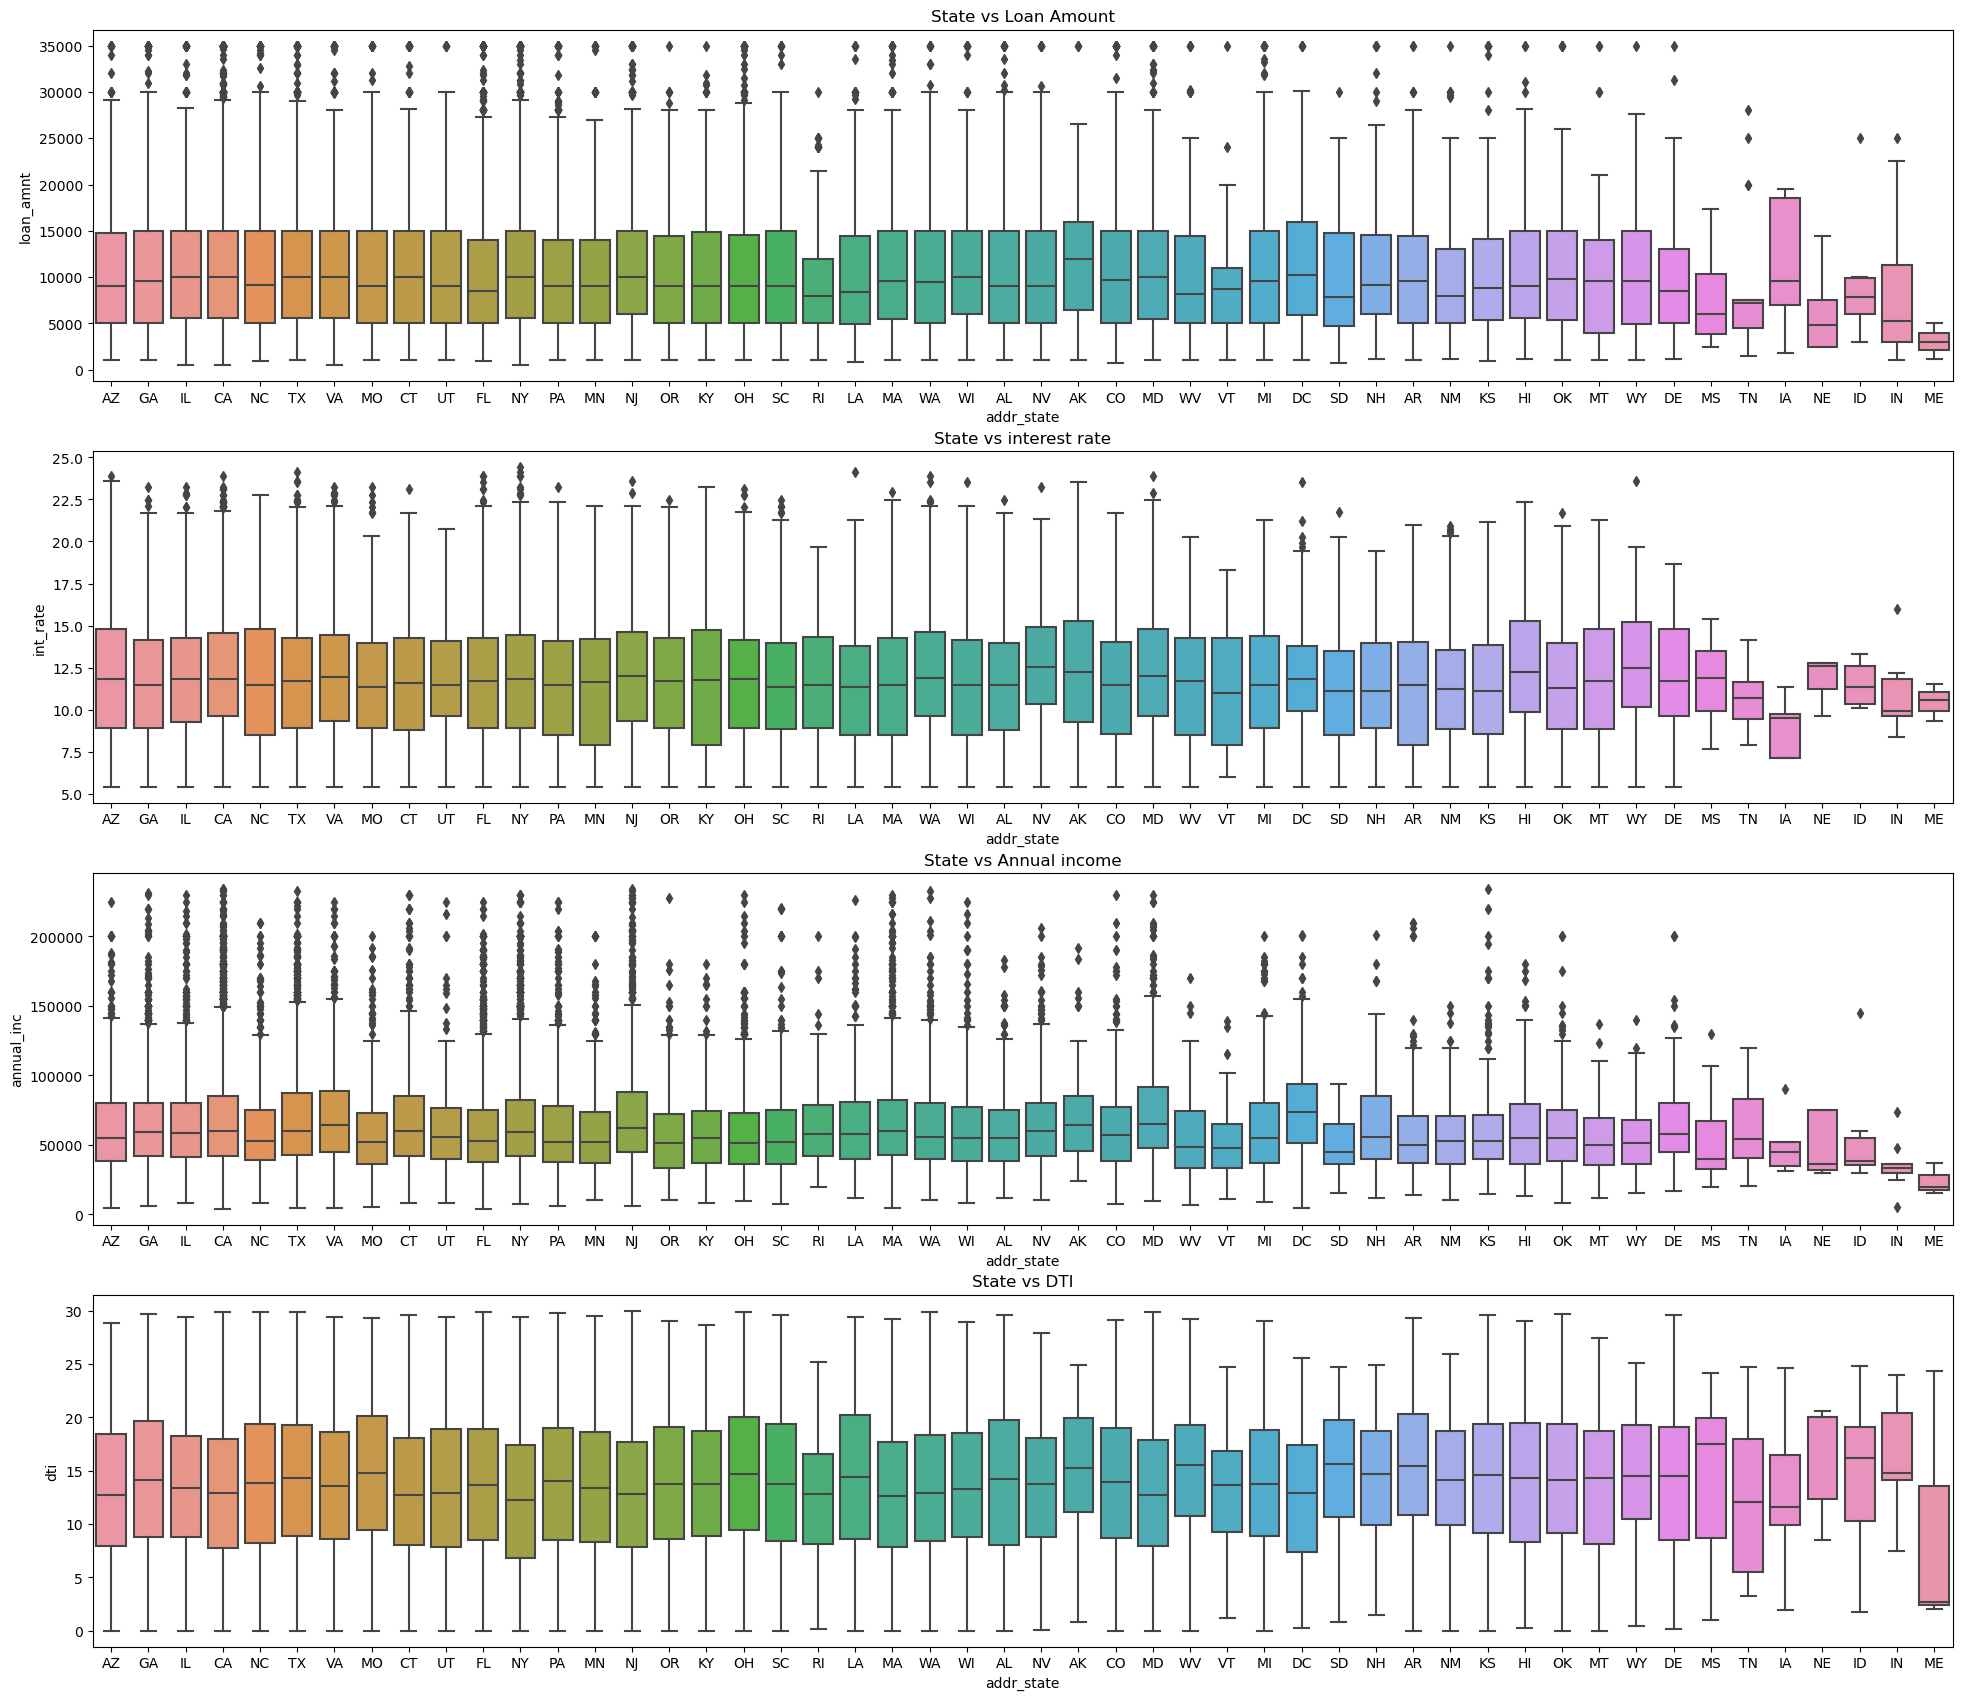

In [84]:
plt.figure(figsize=(24,21))

plt.subplot(4,1,1)
sns.boxplot(x='addr_state', y=loan_df.loan_amnt, data=loan_df)
plt.title('State vs Loan Amount')

plt.subplot(4,1,2)
plt.title('State vs interest rate')
sns.boxplot(x='addr_state', y=loan_df.int_rate, data=loan_df)

plt.subplot(4,1,3)
sns.boxplot(x='addr_state', y=loan_df.annual_inc, data=loan_df)
plt.title('State vs Annual income')

plt.subplot(4,1,4)
sns.boxplot(x='addr_state', y=loan_df.dti, data=loan_df)
plt.title('State vs DTI')

#### <span style="color:blue"> Observation </span>
No specific pattern observed among states

---

### Issue_year Vs numerical values (loan_amnt,int_rate,annual_inc,dti)

Text(0.5, 1.0, 'issue_year vs DTI')

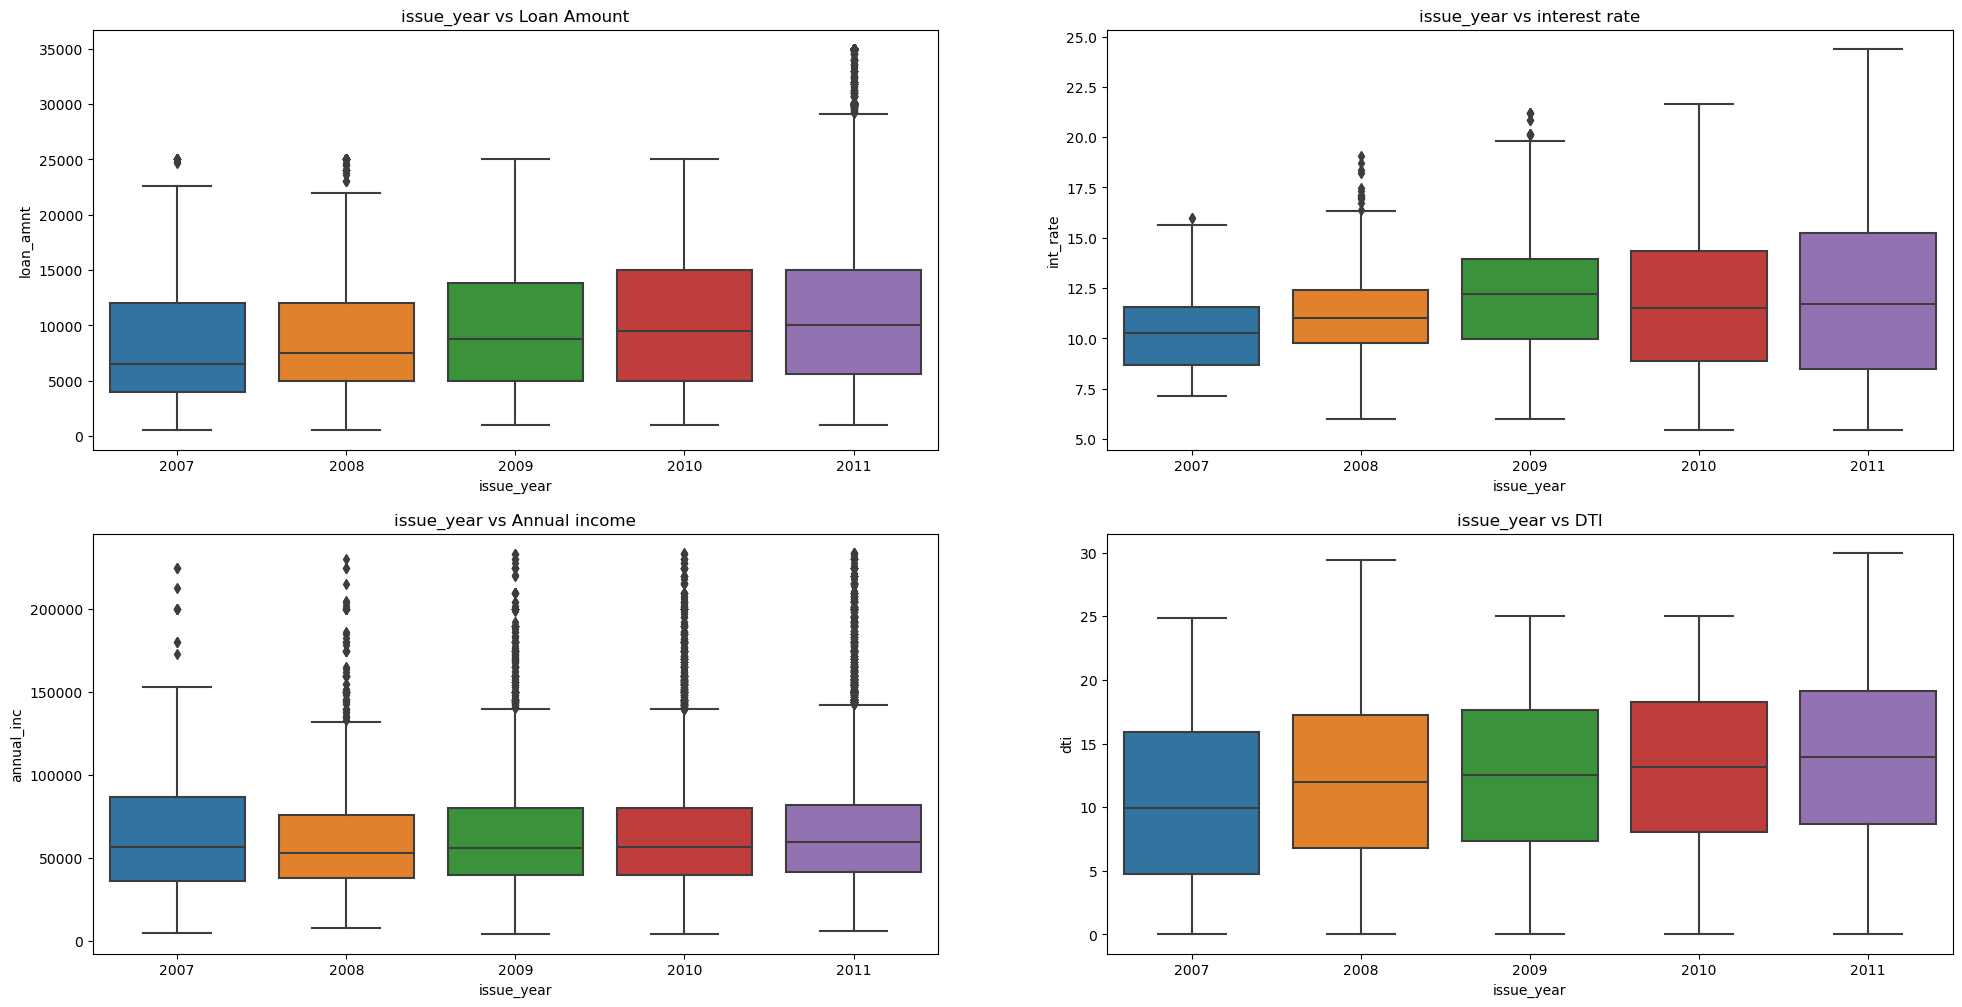

In [85]:
plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
sns.boxplot(x='issue_year', y=loan_df.loan_amnt, data=loan_df)
plt.title('issue_year vs Loan Amount')

plt.subplot(2,2,2)
plt.title('issue_year vs interest rate')
sns.boxplot(x='issue_year', y=loan_df.int_rate, data=loan_df)

plt.subplot(2,2,3)
sns.boxplot(x='issue_year', y=loan_df.annual_inc, data=loan_df)
plt.title('issue_year vs Annual income')

plt.subplot(2,2,4)
sns.boxplot(x='issue_year', y=loan_df.dti, data=loan_df)
plt.title('issue_year vs DTI')

#### <span style="color:blue"> Observation </span>
loan amount have increased gradually over the years from 2007 to 2011 since the mean is increasing year on year<br>
DTI have gradually increased over the years<br>
Interest rates are diverse over the years<br>
Annual income almost same across the years<br>

-----

## Bivariate Analysis
- Categorical Vs Categorical
- Categorical Vs Numerical
- Numerical Vs Numerical

### 'term'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

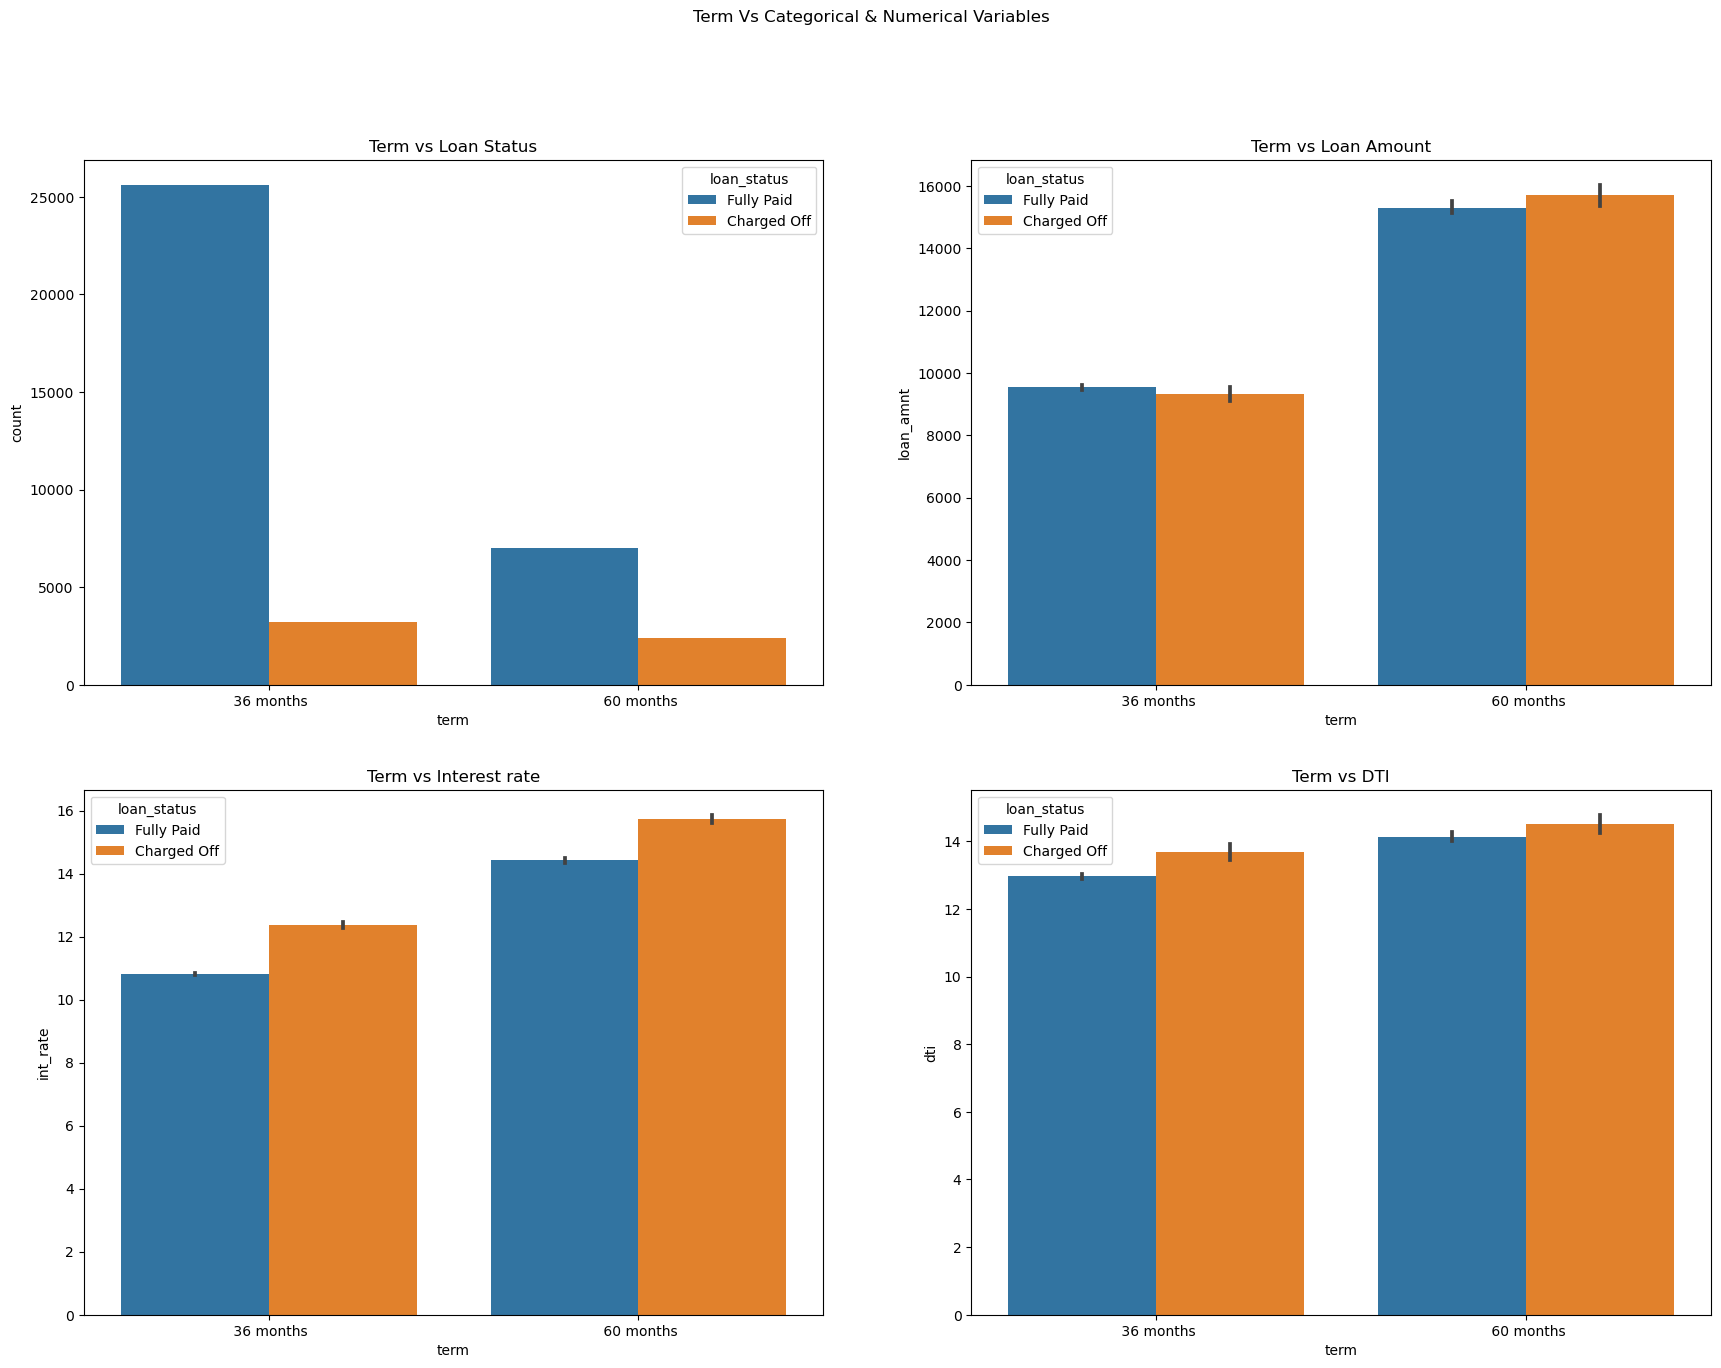

In [86]:
plt.figure(figsize=(21,15))
plt.suptitle('Term Vs Categorical & Numerical Variables')
plt.subplot(2,2,1)
plt.title('Term vs Loan Status')
sns.countplot(x='term',hue='loan_status',data=loan_df)

plt.subplot(2,2,2)
plt.title('Term vs Loan Amount')
sns.barplot(x='term',y='loan_amnt',hue='loan_status',data=loan_df)

plt.subplot(2,2,3)
plt.title('Term vs Interest rate')
sns.barplot(x='term',y='int_rate',hue='loan_status',data=loan_df)

plt.subplot(2,2,4)
plt.title('Term vs DTI')
sns.barplot(x='term',y='dti',hue='loan_status',data=loan_df)

plt.show()

#### <span style="color:blue"> Observation </span>
Fully Paid is higher in 36 months term <br>
Loan amount does not serve as a determining factor for defaults in both the 36-month and 60-month loan tenures. Borrowers exhibit a balanced distribution between defaults and non-defaults across both of these tenures.<br>
When interest rates are elevated, the default rate increases for both the 36-month and 60-month loan tenures.<br>
charge-off are higher when compared with fully-paid for the Debit to income ratio

---

### 'Grade'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

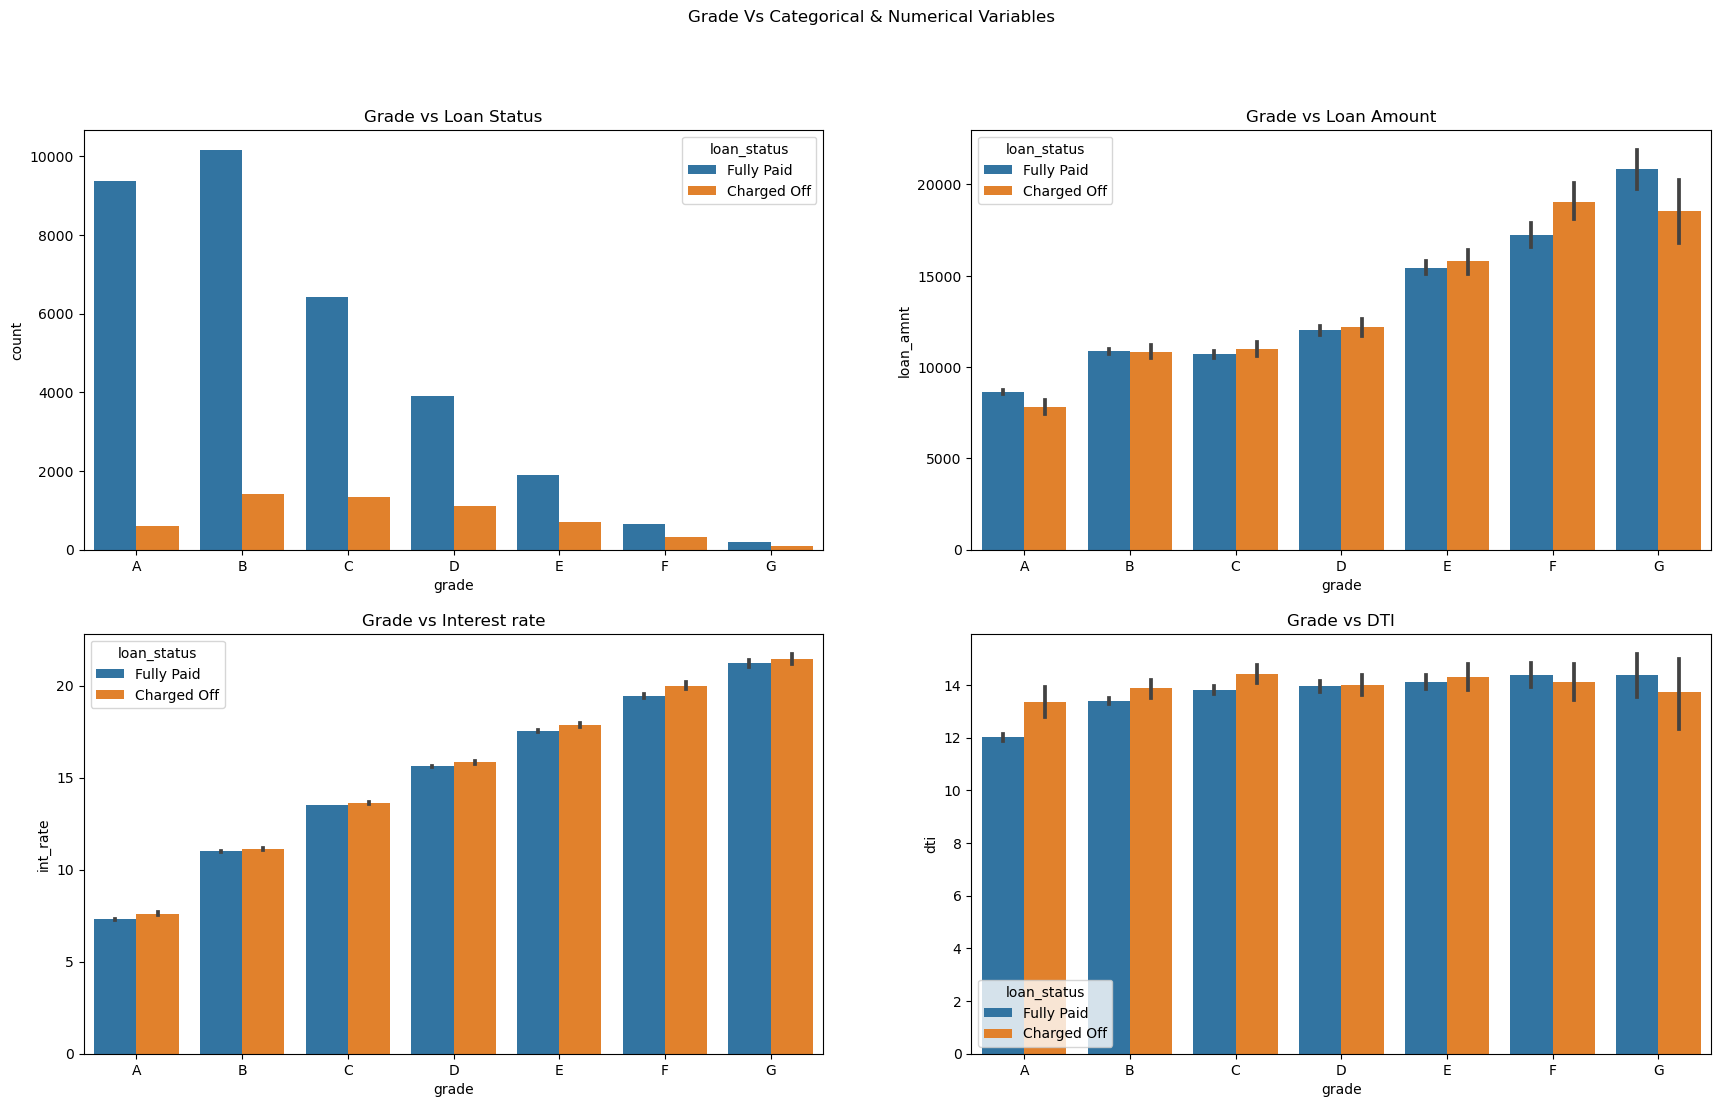

In [87]:
plt.figure(figsize=(21,12))
plt.suptitle('Grade Vs Categorical & Numerical Variables')
plt.subplot(2,2,1)
plt.title('Grade vs Loan Status')
sns.countplot(x='grade',hue='loan_status',data=loan_df,order=['A','B','C','D','E','F','G'])

plt.subplot(2,2,2)
plt.title('Grade vs Loan Amount')
sns.barplot(x='grade',y='loan_amnt',hue='loan_status',data=loan_df,order=['A','B','C','D','E','F','G'])

plt.subplot(2,2,3)
plt.title('Grade vs Interest rate')
sns.barplot(x='grade',y='int_rate',hue='loan_status',data=loan_df,order=['A','B','C','D','E','F','G'])

plt.subplot(2,2,4)
plt.title('Grade vs DTI')
sns.barplot(x='grade',y='dti',hue='loan_status',data=loan_df,order=['A','B','C','D','E','F','G'])

plt.show()

#### <span style="color:blue"> Observation </span>
As grade decreases Charge Offs interest rates increates<br>
As grade decreases loan amount increases who are more prone to default<br>
For grade F and G the difference between Fully paid and Charge offs is higher

-----

### 'Emp_length'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

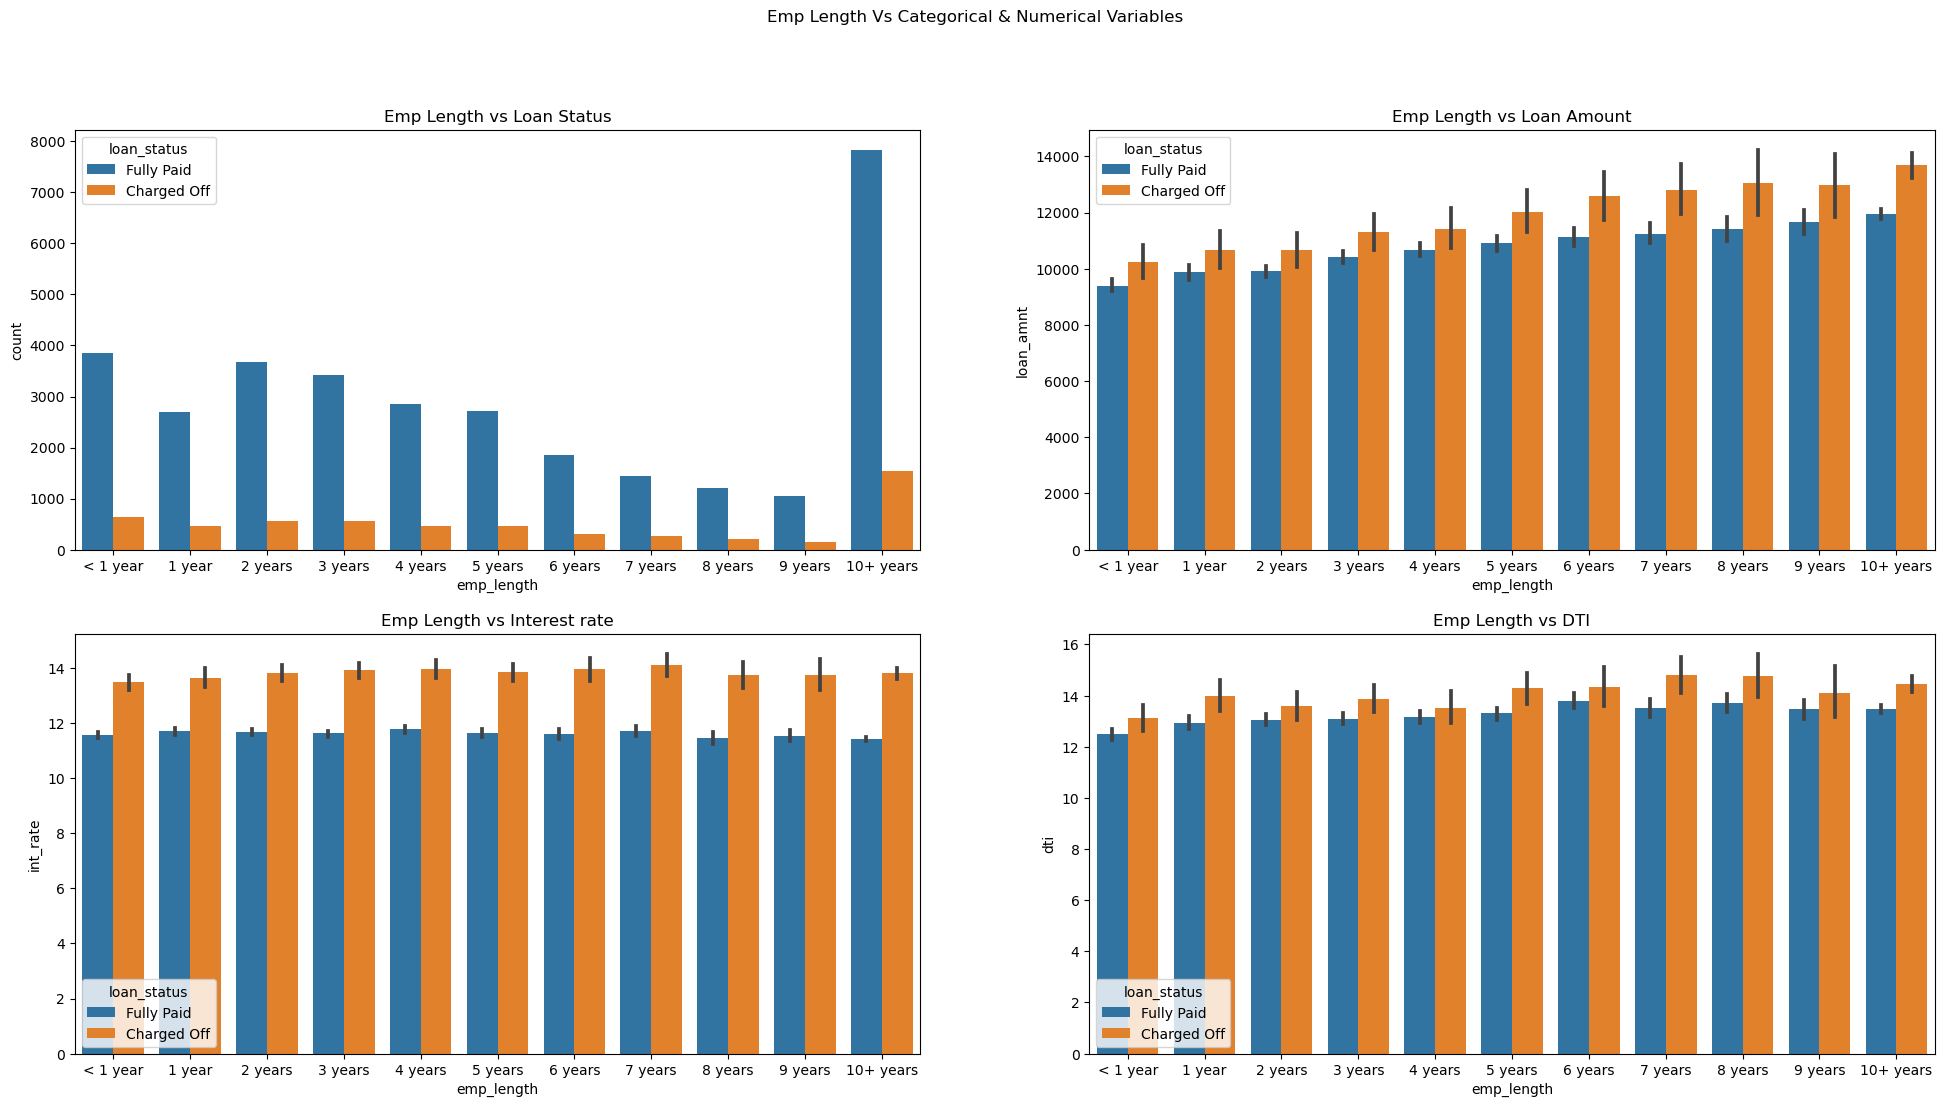

In [88]:
plt.figure(figsize=(24,12))
plt.suptitle('Emp Length Vs Categorical & Numerical Variables')
plt.subplot(2,2,1)
plt.title('Emp Length vs Loan Status')
sns.countplot(x='emp_length',hue='loan_status',data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])

plt.subplot(2,2,2)
plt.title('Emp Length vs Loan Amount')
sns.barplot(x='emp_length',y='loan_amnt',hue='loan_status',data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])

plt.subplot(2,2,3)
plt.title('Emp Length vs Interest rate')
sns.barplot(x='emp_length',y='int_rate',hue='loan_status',data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])

plt.subplot(2,2,4)
plt.title('Emp Length vs DTI')
sns.barplot(x='emp_length',y='dti',hue='loan_status',data=loan_df,order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'])

plt.show()

#### <span style="color:blue"> Observation </span>
No pattern observed for defaulters across employment lengths<br>
Borrowers with higher employment lengths have taken high loan amounts and also got more default rate.<br>
The difference of interest rates between Fully Paid Vs Defaulters is consistent across employment length<br>
no patterns observed for DTI

-----

### 'Home Ownership'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

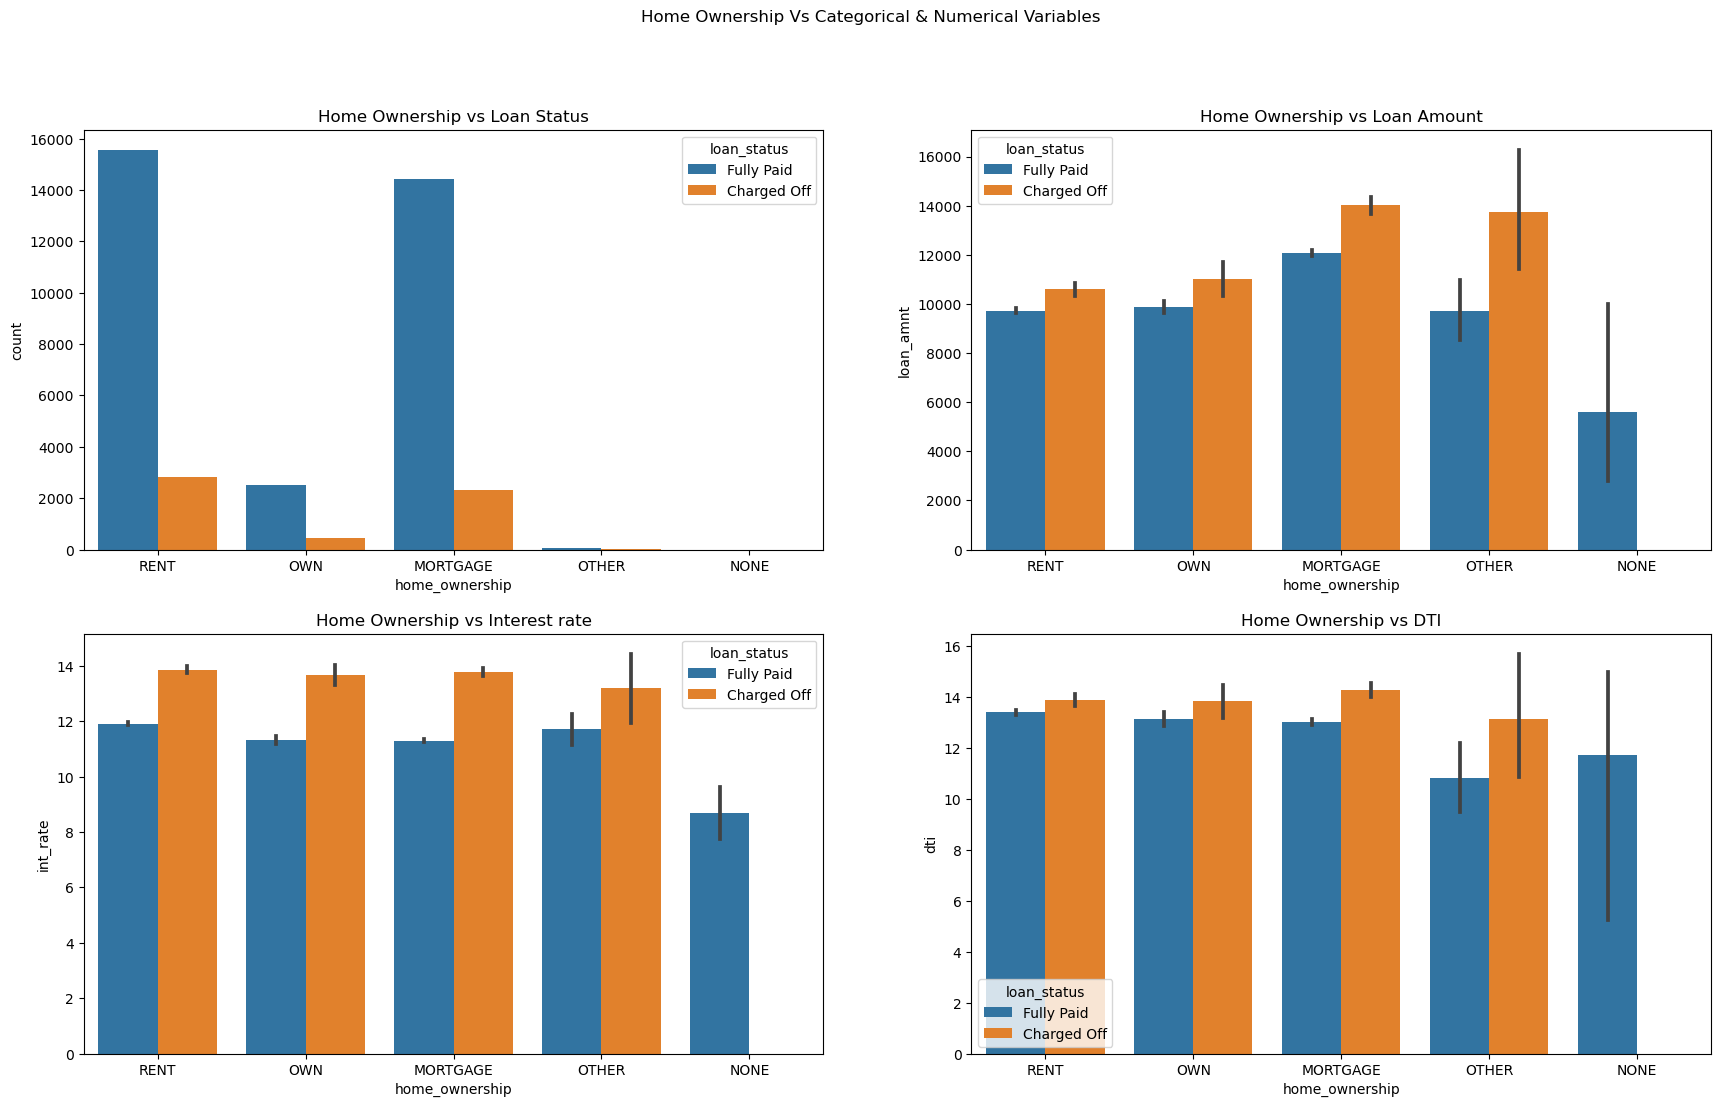

In [89]:
plt.figure(figsize=(21,12))
plt.suptitle('Home Ownership Vs Categorical & Numerical Variables')
plt.subplot(2,2,1)
plt.title('Home Ownership vs Loan Status')
sns.countplot(x='home_ownership',hue='loan_status',data=loan_df)

plt.subplot(2,2,2)
plt.title('Home Ownership vs Loan Amount')
sns.barplot(x='home_ownership',y='loan_amnt',hue='loan_status',data=loan_df)

plt.subplot(2,2,3)
plt.title('Home Ownership vs Interest rate')
sns.barplot(x='home_ownership',y='int_rate',hue='loan_status',data=loan_df)

plt.subplot(2,2,4)
plt.title('Home Ownership vs DTI')
sns.barplot(x='home_ownership',y='dti',hue='loan_status',data=loan_df)

plt.show()

#### <span style="color:blue"> Observation </span>
Rent category have higher chargeoffs as compared to other categories<br>
Borrowers with Mortgage have higher defaulters as compared to other categories<br>
interest rate is higher for rented borrowers which tends to default more

-----

### 'State'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

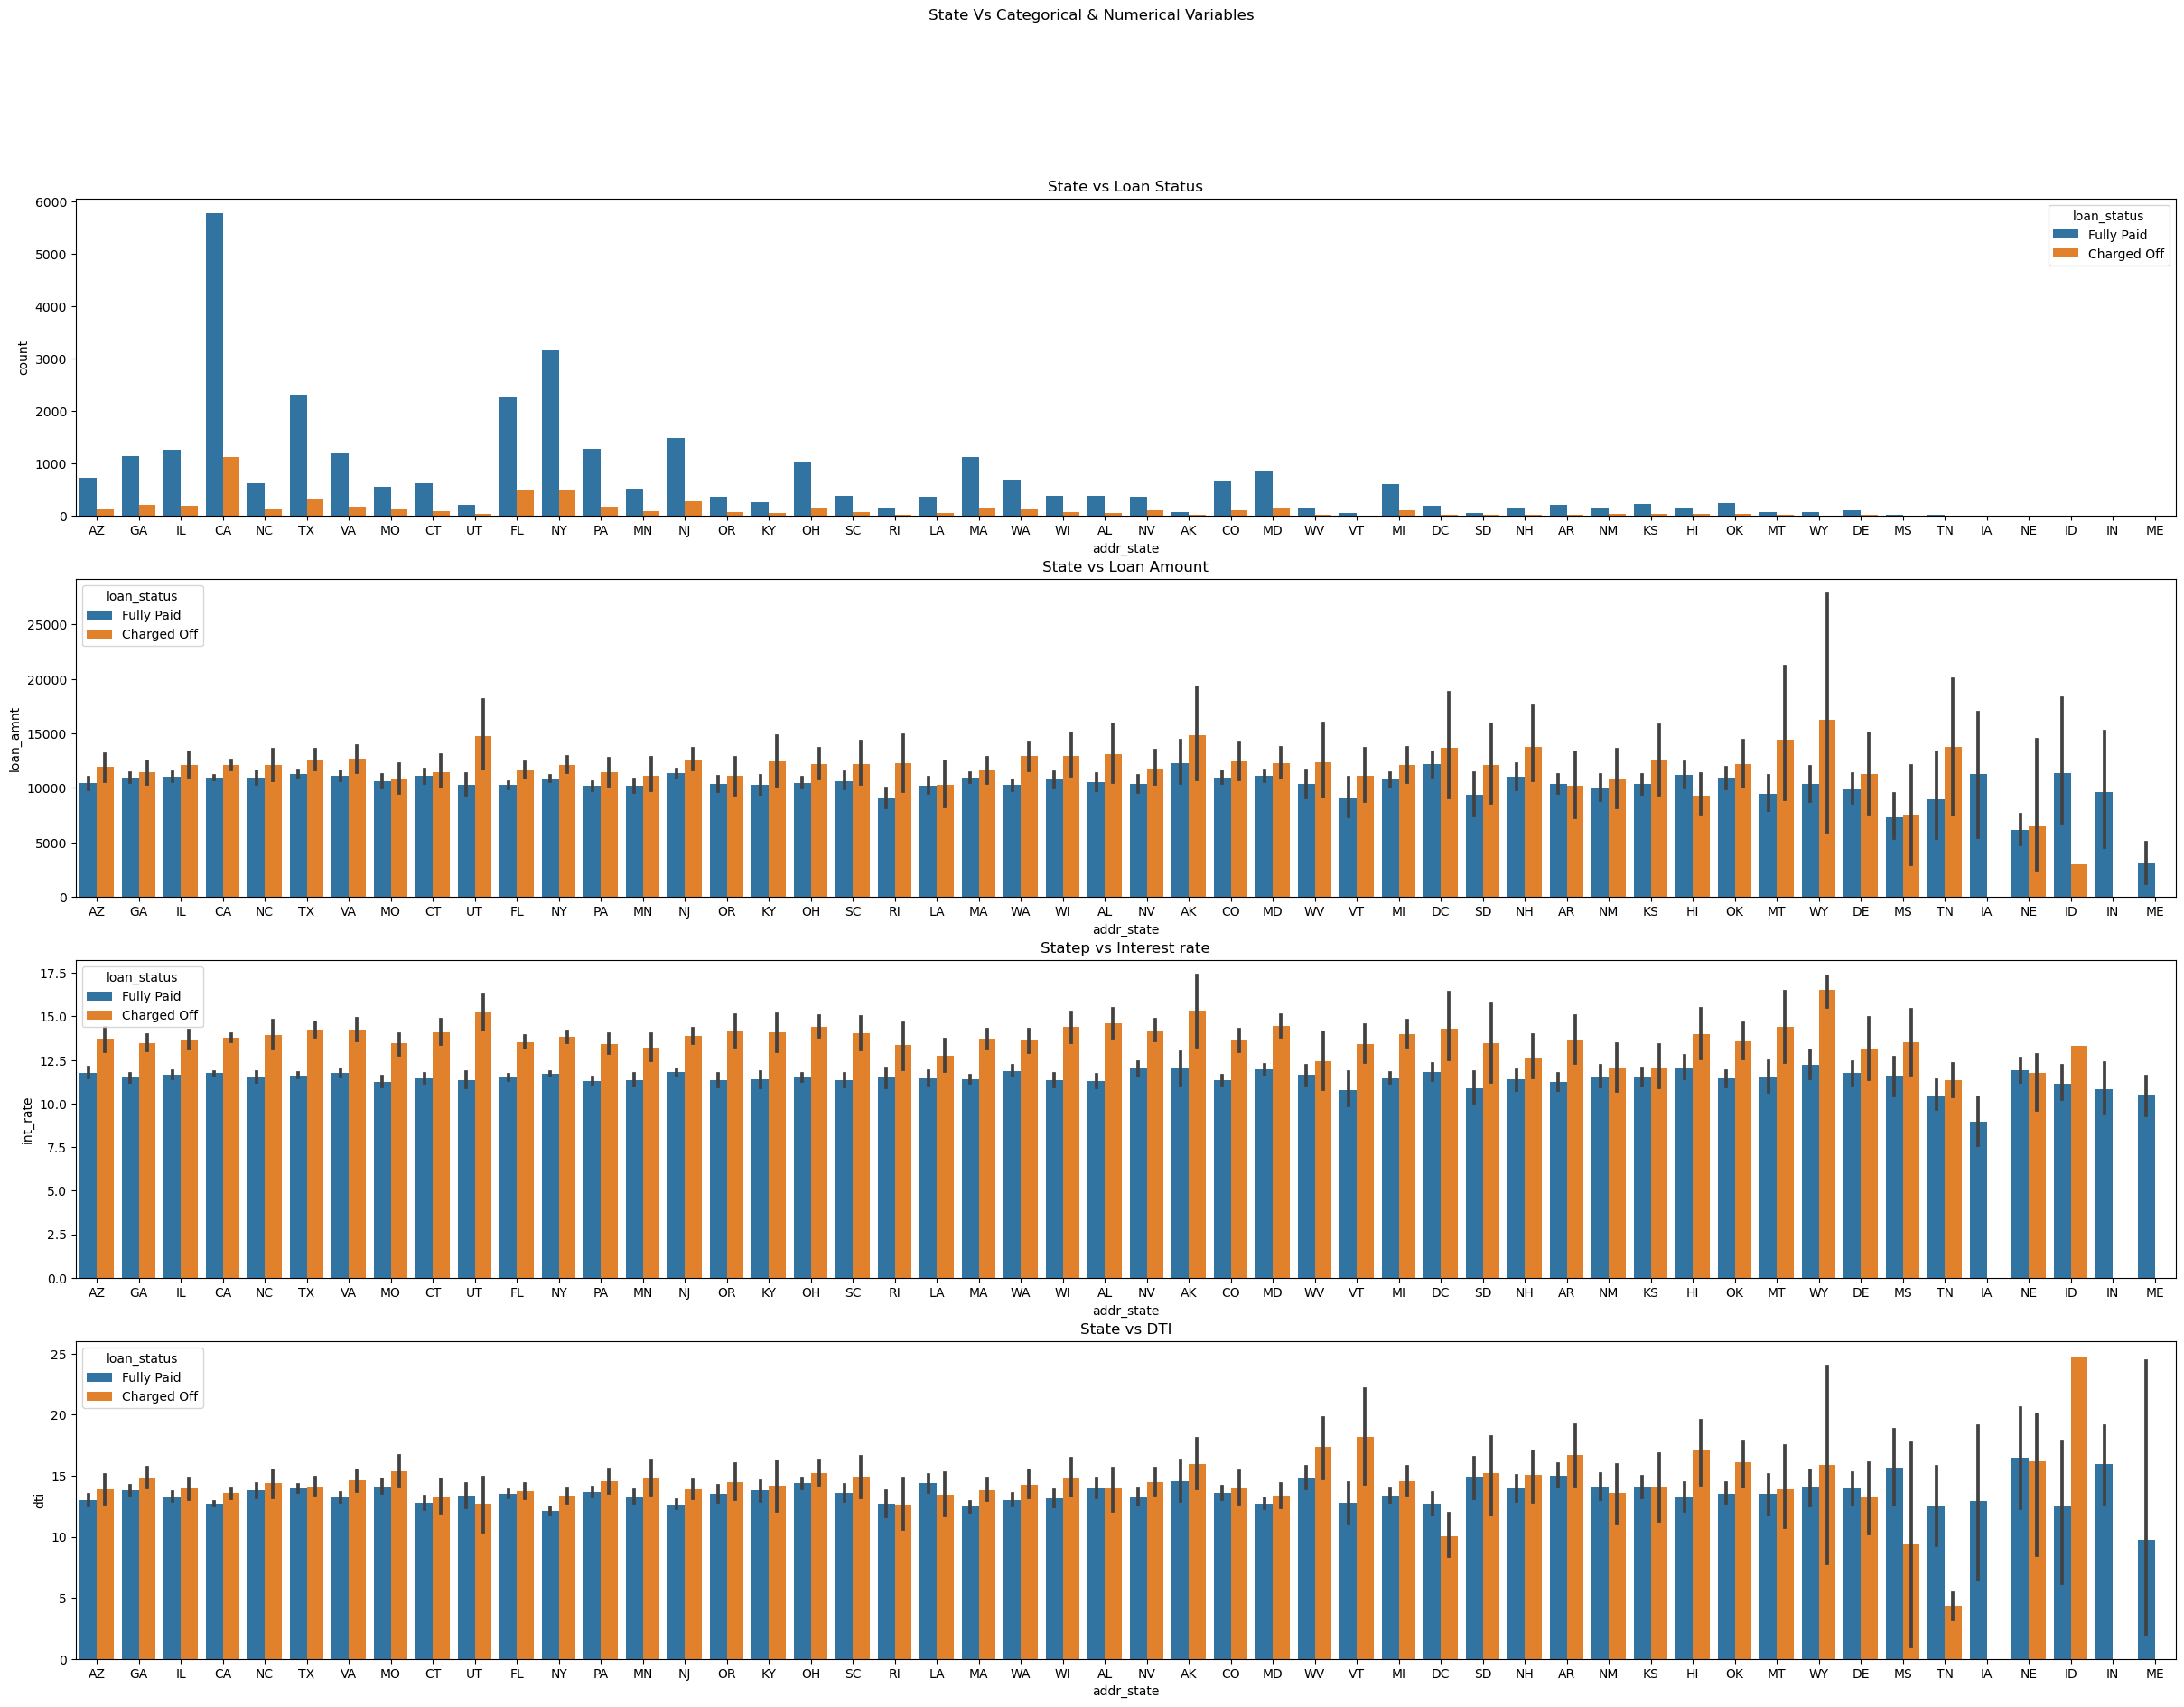

In [90]:
plt.figure(figsize=(30,21))
plt.suptitle('State Vs Categorical & Numerical Variables')
plt.subplot(4,1,1)
plt.title('State vs Loan Status')
sns.countplot(x='addr_state',hue='loan_status',data=loan_df)

plt.subplot(4,1,2)
plt.title('State vs Loan Amount')
sns.barplot(x='addr_state',y='loan_amnt',hue='loan_status',data=loan_df)

plt.subplot(4,1,3)
plt.title('Statep vs Interest rate')
sns.barplot(x='addr_state',y='int_rate',hue='loan_status',data=loan_df)

plt.subplot(4,1,4)
plt.title('State vs DTI')
sns.barplot(x='addr_state',y='dti',hue='loan_status',data=loan_df)

plt.show()

#### <span style="color:blue"> Observation </span>
CA has highest defaulters<br>
More borrowers are from CA,FL,NY<br>
Defaulters are much higher compared to Fully paid in states - UT,AK,RI,MT,WI<br>
Interest rate is higher for UT,AK,WY state which is prone to default<br>
DTI is highest for state ID

-----

### 'Verification Status'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

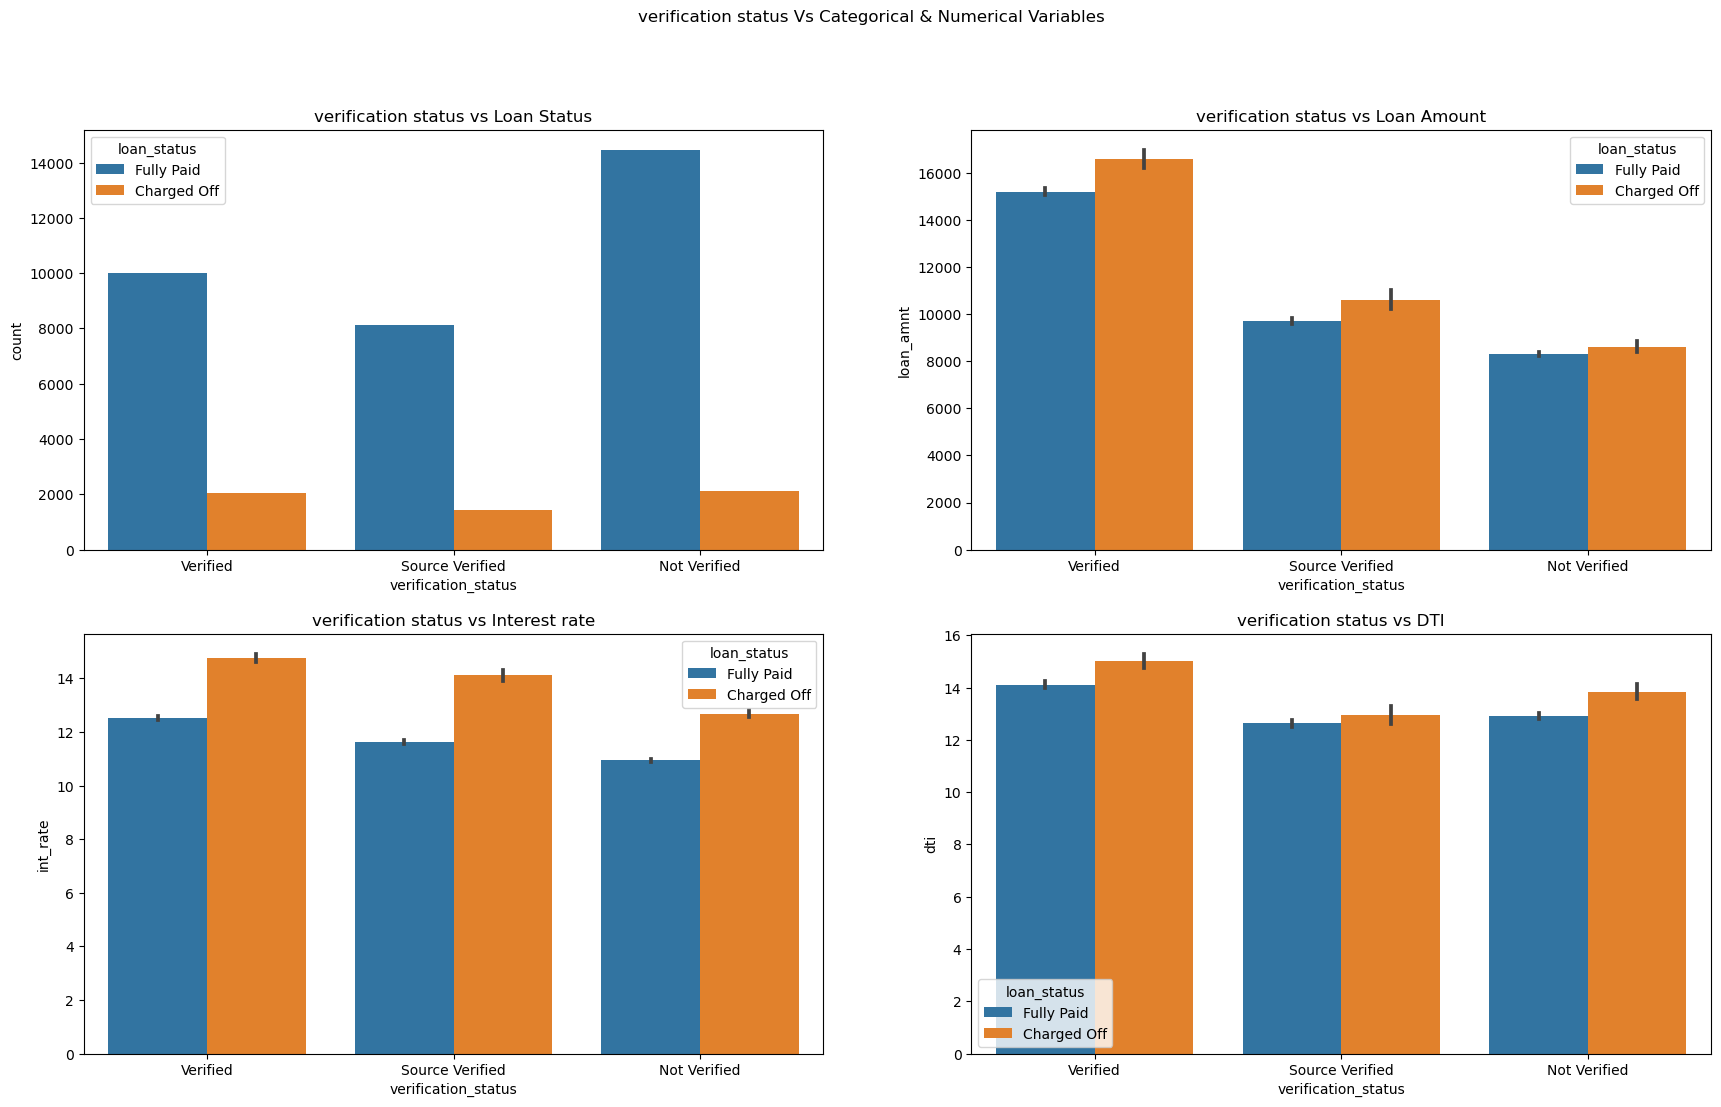

In [91]:
plt.figure(figsize=(21,12))
plt.suptitle('verification status Vs Categorical & Numerical Variables')
plt.subplot(2,2,1)
plt.title('verification status vs Loan Status')
sns.countplot(x='verification_status',hue='loan_status',data=loan_df)

plt.subplot(2,2,2)
plt.title('verification status vs Loan Amount')
sns.barplot(x='verification_status',y='loan_amnt',hue='loan_status',data=loan_df)

plt.subplot(2,2,3)
plt.title('verification status vs Interest rate')
sns.barplot(x='verification_status',y='int_rate',hue='loan_status',data=loan_df)

plt.subplot(2,2,4)
plt.title('verification status vs DTI')
sns.barplot(x='verification_status',y='dti',hue='loan_status',data=loan_df)

plt.show()

#### <span style="color:blue"> Observation </span>
Verified were given more loan amounts, also Defaulters are more in verified category<br>
interest offered for Verified is comparitively more<br>
DTI is higher for Verified category

-----

### 'Purpose'(Categorical) Vs (Categorical,Numerical) - Bivariate Analysis

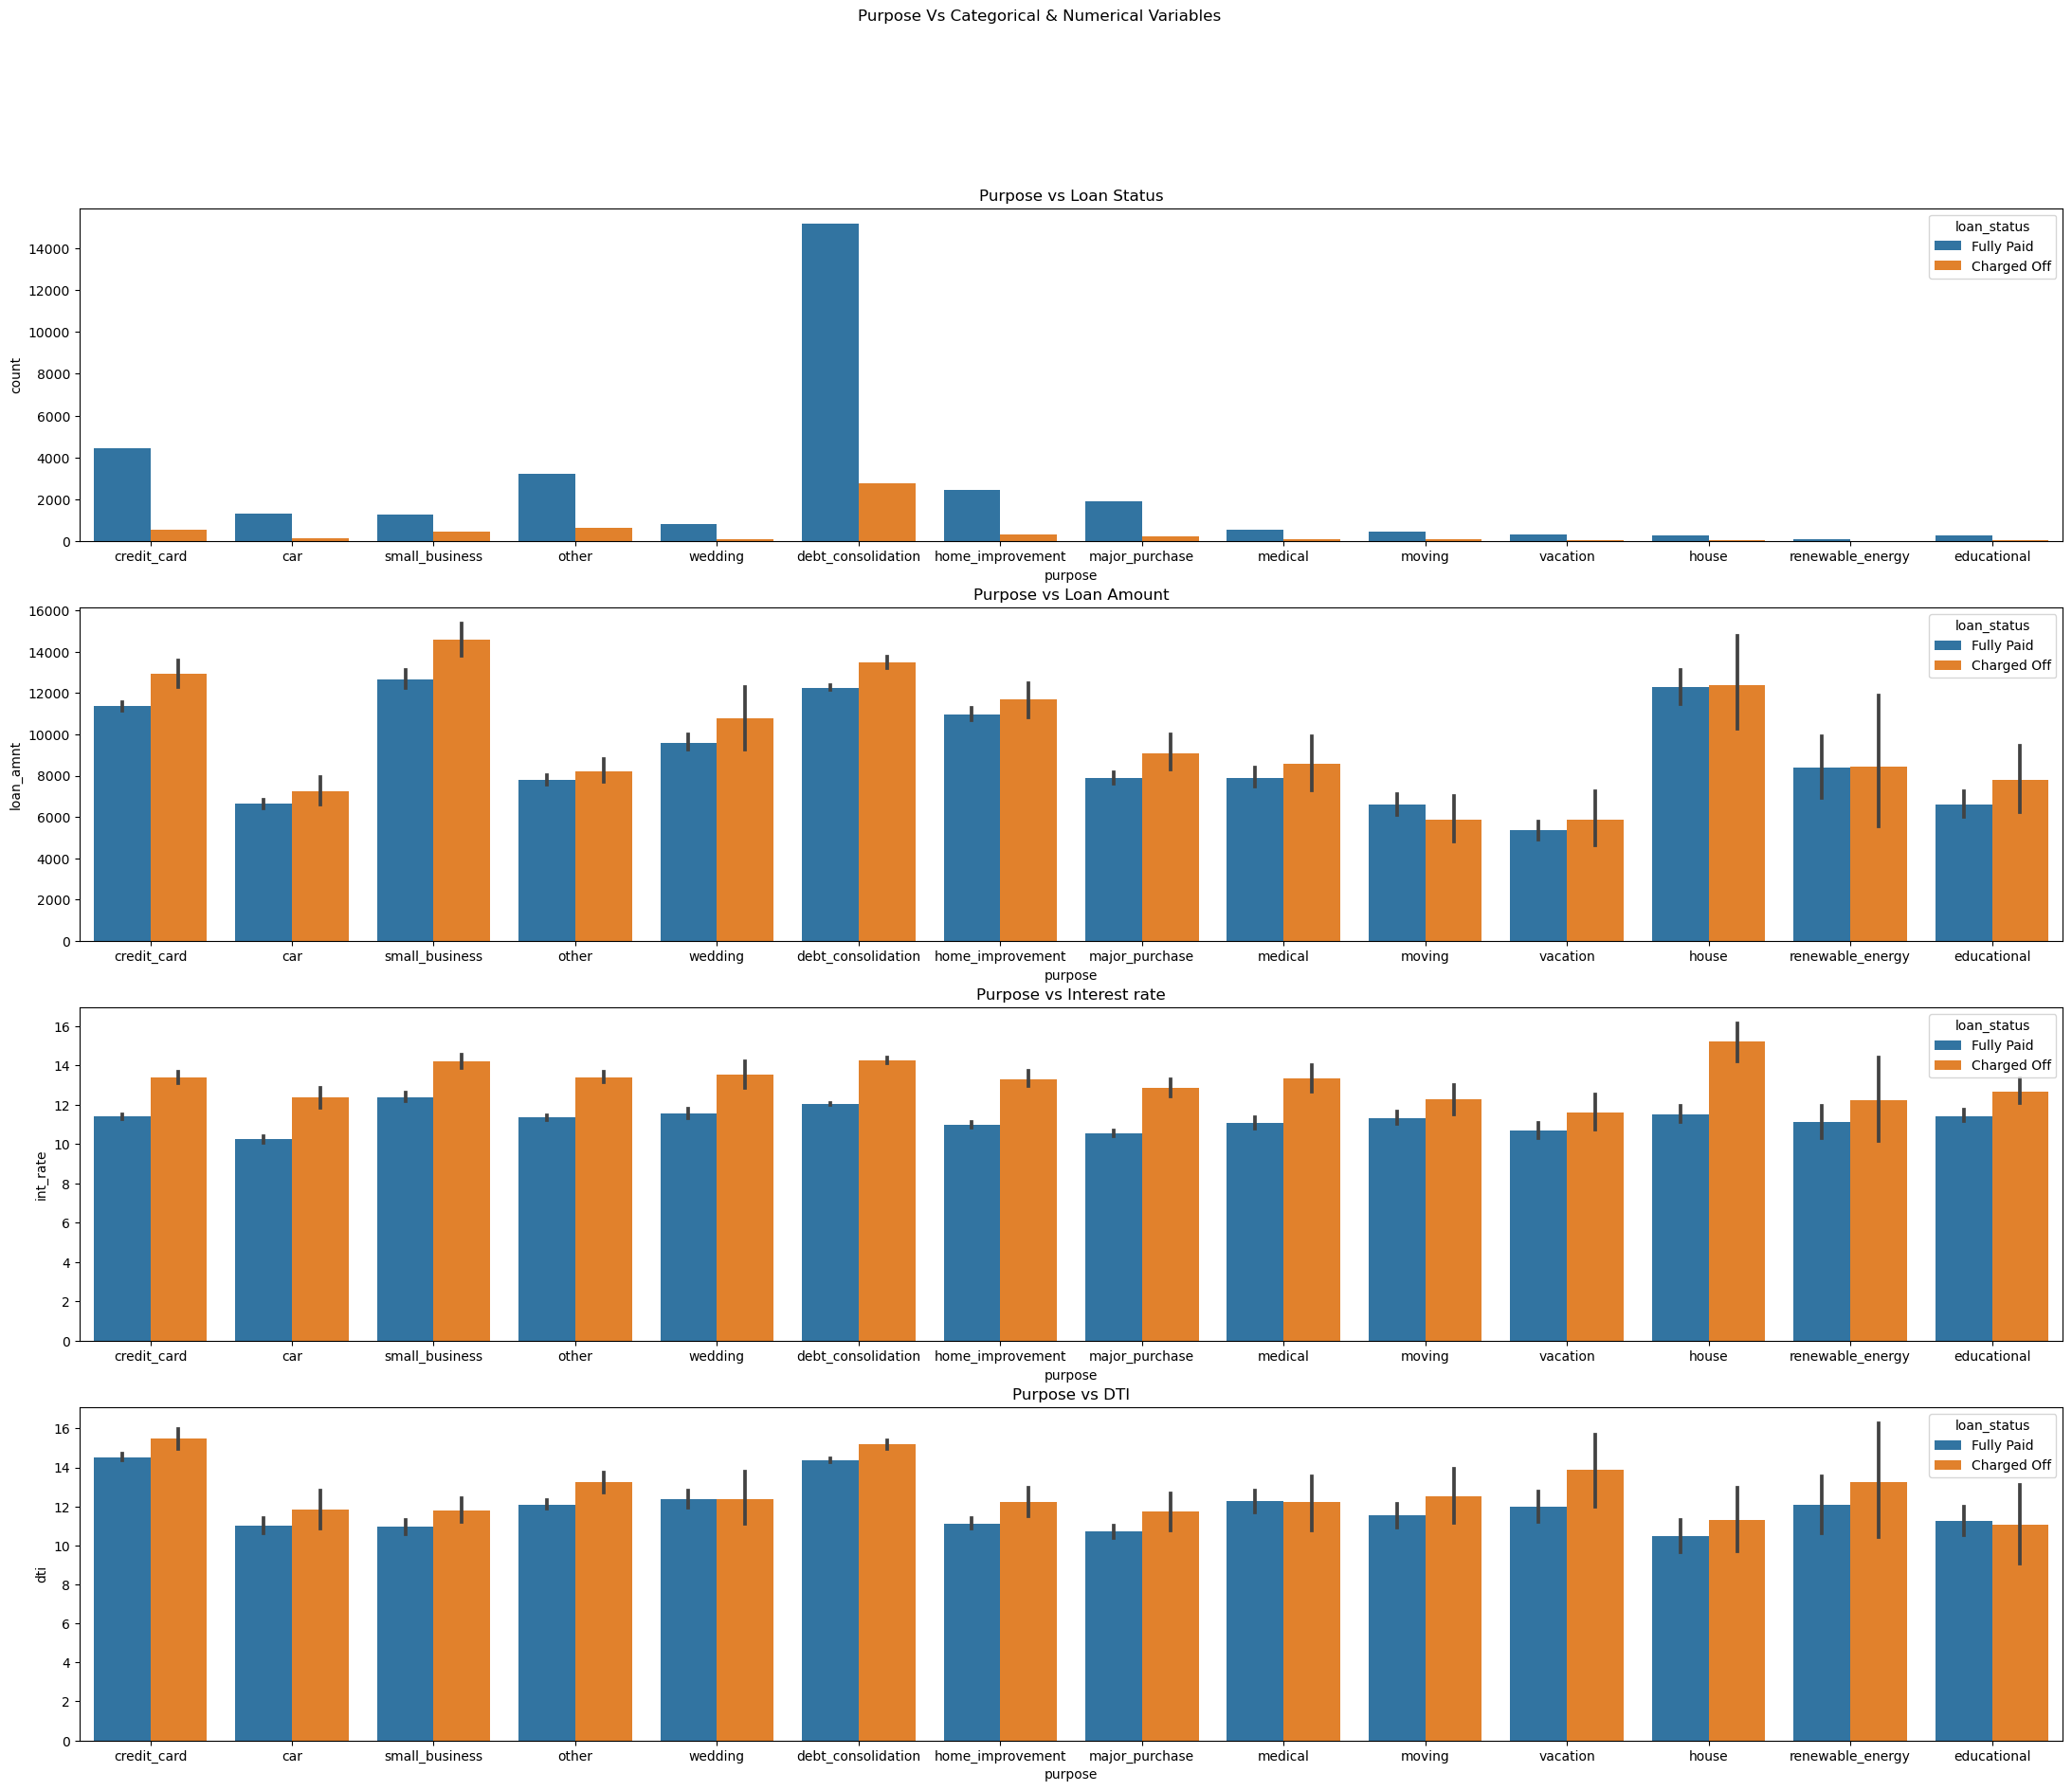

In [92]:
plt.figure(figsize=(27,21))
plt.suptitle('Purpose Vs Categorical & Numerical Variables')
plt.subplot(4,1,1)
plt.title('Purpose vs Loan Status')
sns.countplot(x='purpose',hue='loan_status',data=loan_df)

plt.subplot(4,1,2)
plt.title('Purpose vs Loan Amount')
sns.barplot(x='purpose',y='loan_amnt',hue='loan_status',data=loan_df)

plt.subplot(4,1,3)
plt.title('Purpose vs Interest rate')
sns.barplot(x='purpose',y='int_rate',hue='loan_status',data=loan_df)

plt.subplot(4,1,4)
plt.title('Purpose vs DTI')
sns.barplot(x='purpose',y='dti',hue='loan_status',data=loan_df)

plt.show()

#### <span style="color:blue"> Observation </span>
More loans were borrowed for Debt consolidation<br>
More defaulters have defaulted in Debt consolidation loan purpose<br>
Interest rate for House is higher among defaulters followed by debt consolidation<br>
DTI is higher for purpose - credit card and debt consolidation<br>
Loan amount is higher for defaulters against fully paid in all categories except moving category

----

### 'Loan amount '(Numerical) Vs int rate(Numerical) - Bivariate Analysis

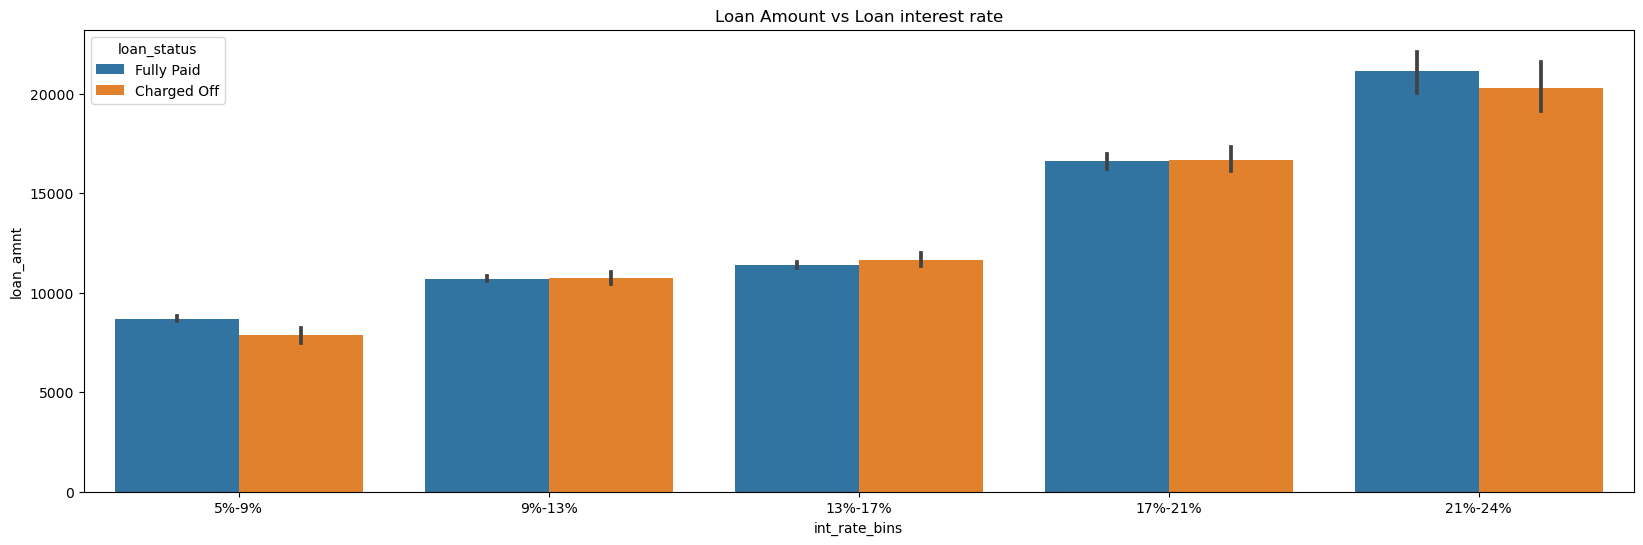

In [93]:
# Analysis will be done on the interest rate bucket(categorical)
# The int_rate_bins column was derived from numerical column 'int_rate' to convert it to categorical variable.
plt.figure(figsize=(20,6))
sns.barplot(x='int_rate_bins',y='loan_amnt',hue='loan_status',data=loan_df)
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### <span style="color:blue"> Observation </span>
With increase in loan amount the interest rates increased i.e. higher loans were given for higher rates

-----

### 'Loan amount '(Numerical) Vs annual_income (Numerical) - Bivariate Analysis

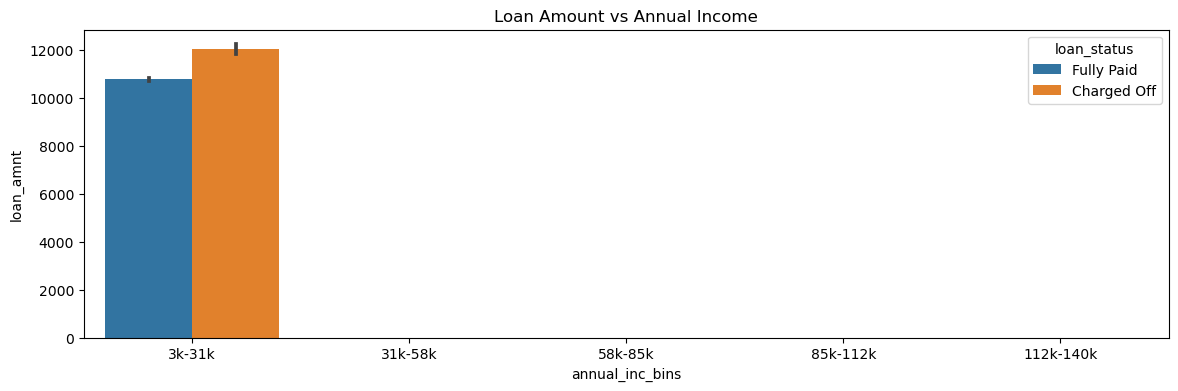

In [94]:
# Analysis will be done on the annual income bucket(categorical)
# The annual_inc_bins column was derived from numerical column 'annual_inc' to convert it to categorical variable.
plt.figure(figsize=(14,4))
sns.barplot(x='annual_inc_bins',y='loan_amnt',hue='loan_status',data=loan_df)
plt.title('Loan Amount vs Annual Income')
plt.show()

#### <span style="color:blue"> Observation </span>
With increase in annual income the loan amount increases.<br>
The defaulters are highest for the highest income groups.

-----

### 'Loan amount '(Numerical) Vs DTI (Numerical) - Bivariate Analysis

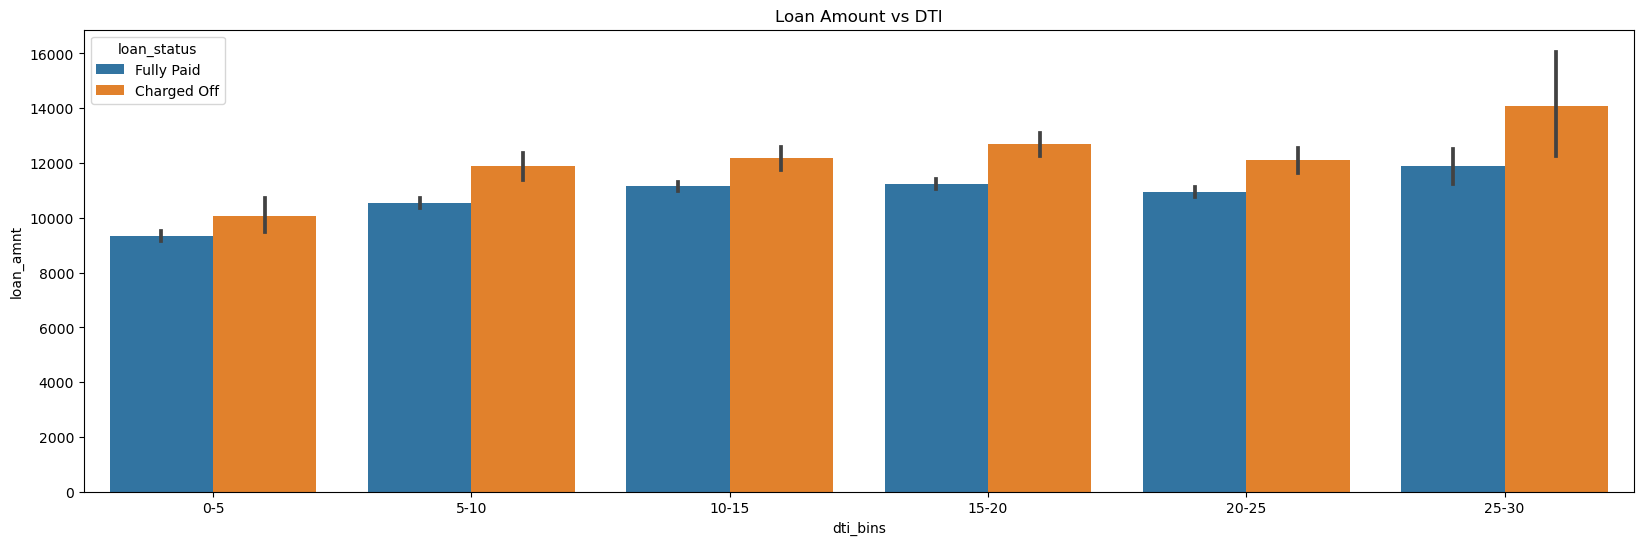

In [95]:
# Analysis will be done on the DTI bucket(categorical)
# The dti_bins column was derived from numerical column 'dti' to convert it to categorical variable.
plt.figure(figsize=(20,6))
sns.barplot(x='dti_bins',y='loan_amnt',hue='loan_status',data=loan_df)
plt.title('Loan Amount vs DTI')
plt.show()

#### <span style="color:blue"> Observation </span>
With increase in DTI the loan amount increases.<br>
The defaulters are highest for the highest DTI group (25-30).

----

### 'int_rate '(Numerical) Vs DTI (Numerical) - Bivariate Analysis

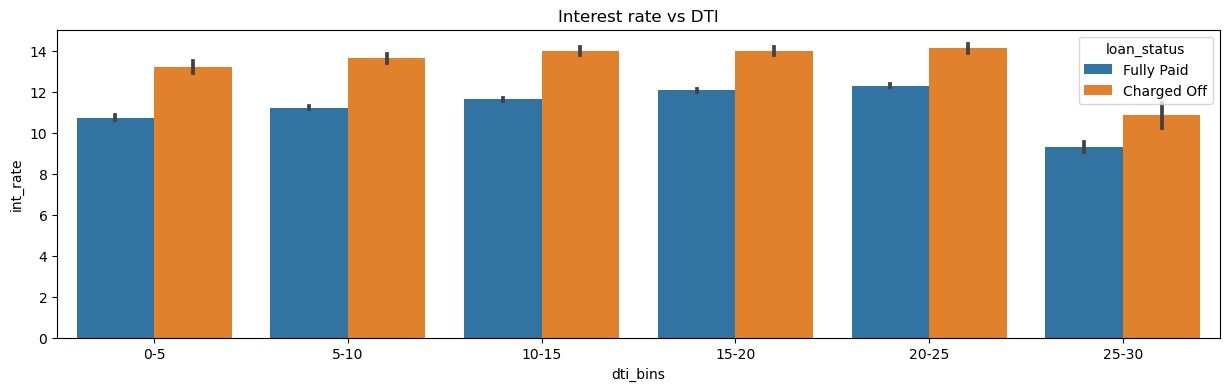

In [96]:
# Analysis will be done on the DTI bucket(categorical)
# The dti_bins column was derived from numerical column 'dti' to convert it to categorical variable.
plt.figure(figsize=(15,4))
sns.barplot(x='dti_bins',y='int_rate',hue='loan_status',data=loan_df)
plt.title('Interest rate vs DTI')
plt.show()

#### <span style="color:blue"> Observation </span>
interest rate is lowest for highest DTI group <br>
defaulters are lowest for highest DTI group

-----

## Correlation Analysis

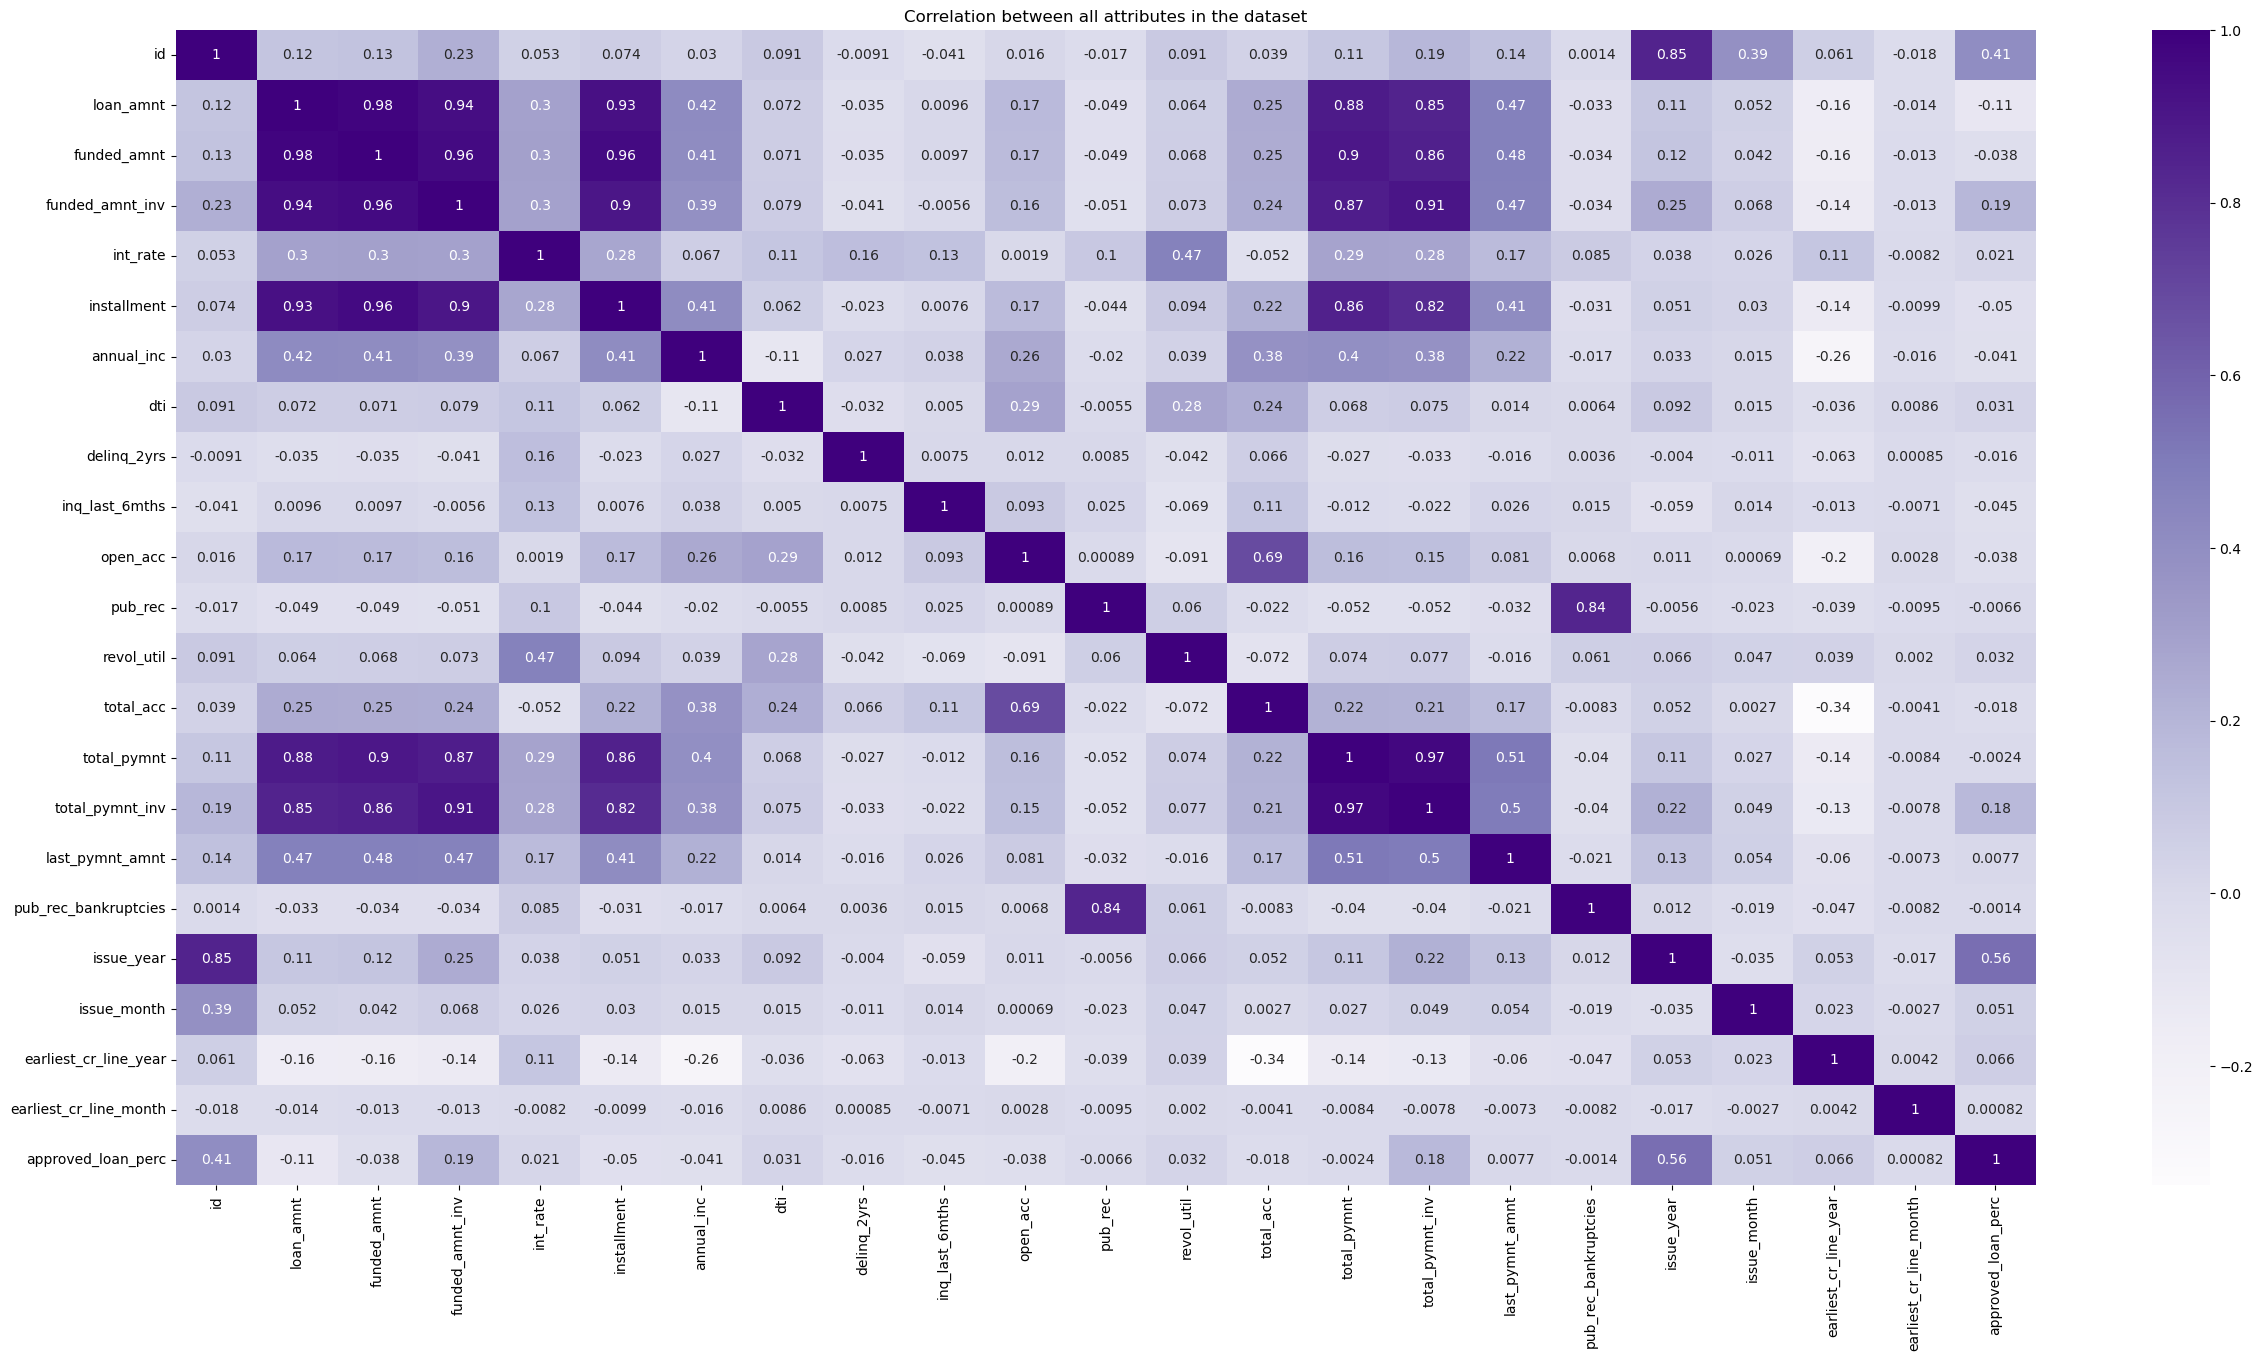

In [97]:
#Finding correlation between all attributes in the data
c_matrix = loan_df.corr()
plt.figure(figsize=(30,15))
#plotting correlation matrix on heat map
sns.heatmap(c_matrix, annot = True, cmap='Purples')
plt.title("Correlation between all attributes in the dataset")
plt.show()

#### <span style="color:blue"> Observation </span>
Loan amount is positively correlated with funded amount and investor funded amount <br>
Pub_rec(Number of derogatory public records) is positively correlated with Number of public record bankruptcies